In [ ]:
%ls

bin@                        datalab/  kaggle/  libx32@                   opt/   sbin@  tools/
boot/                       dev/      lib@     media/                    proc/  srv/   usr/
content/                    etc/      lib32@   mnt/                      root/  sys/   var/
cuda-keyring_1.0-1_all.deb  home/     lib64@   NGC-DL-CONTAINER-LICENSE  run/   tmp/


In [ ]:
%ls

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
df = pd.read_excel('/content/drive/MyDrive/НС_БДЗ/sample_data/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [34]:
names = df.columns.values.tolist()[:-1]
n = len(names)
names

['AT', 'V', 'AP', 'RH']

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

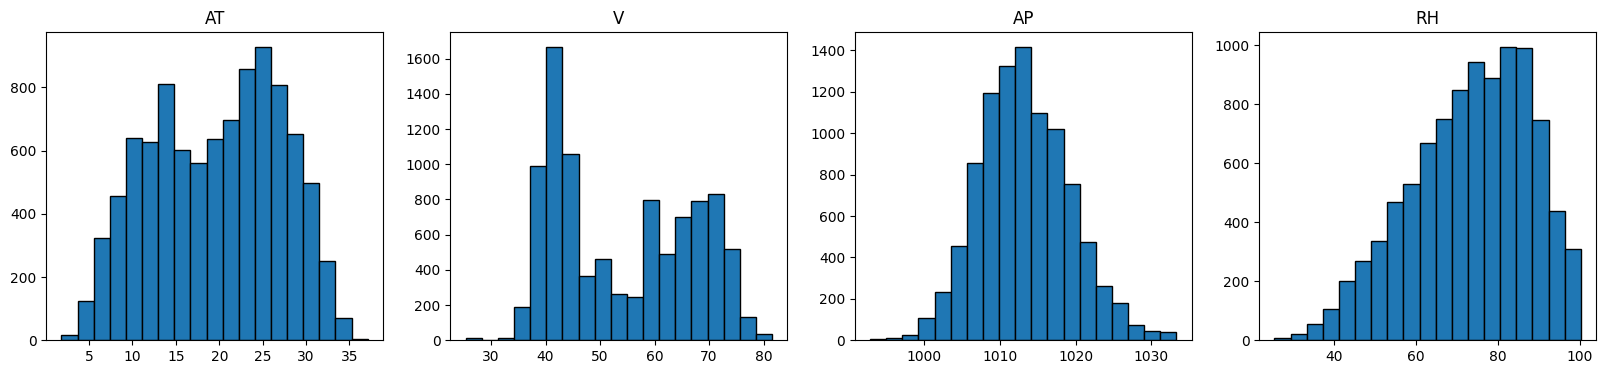

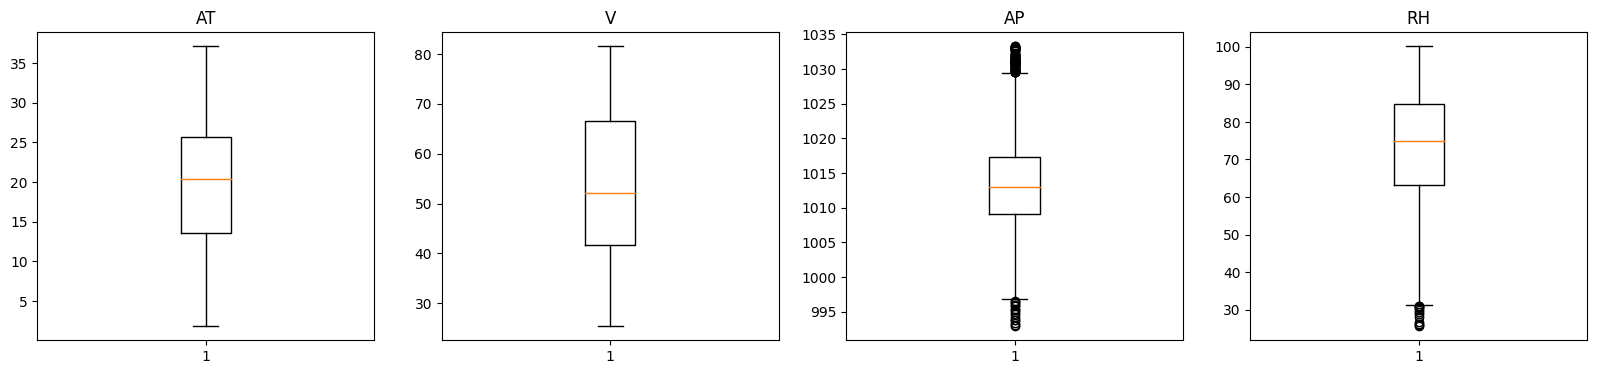

In [35]:
#@title Гистограммы и Box-and-Whisker
fig, ax = plt.subplots(1, n, figsize=(20,4))
for i in range(n):
    x = df[names[i]].to_numpy()
    ax[i].hist(x, bins=np.linspace(min(x), max(x), 20), edgecolor='black')
    ax[i].set_title(names[i])

fig, ax = plt.subplots(1, n, figsize=(20,4))
for i in range(n):
    x = df[names[i]].to_numpy()
    ax[i].boxplot(x)
    ax[i].set_title(names[i])
df.isnull().sum()

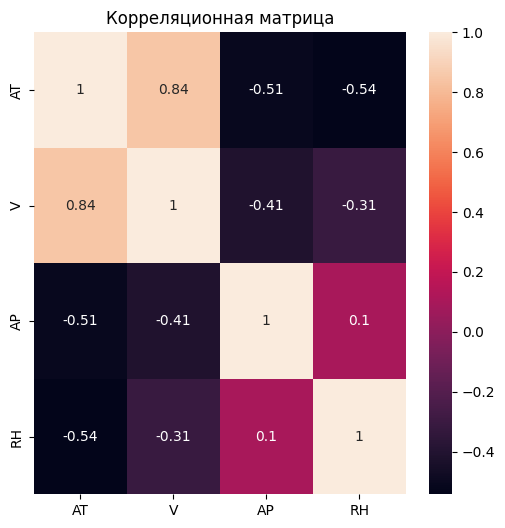

In [36]:
#@title Корреляционная матрица
corr_matrix = df.loc[:, names].corr()

fig, ax = plt.subplots(1, 1, figsize=(6,6))
hm = sns.heatmap(corr_matrix, annot=True)
hm.set_title('Корреляционная матрица');

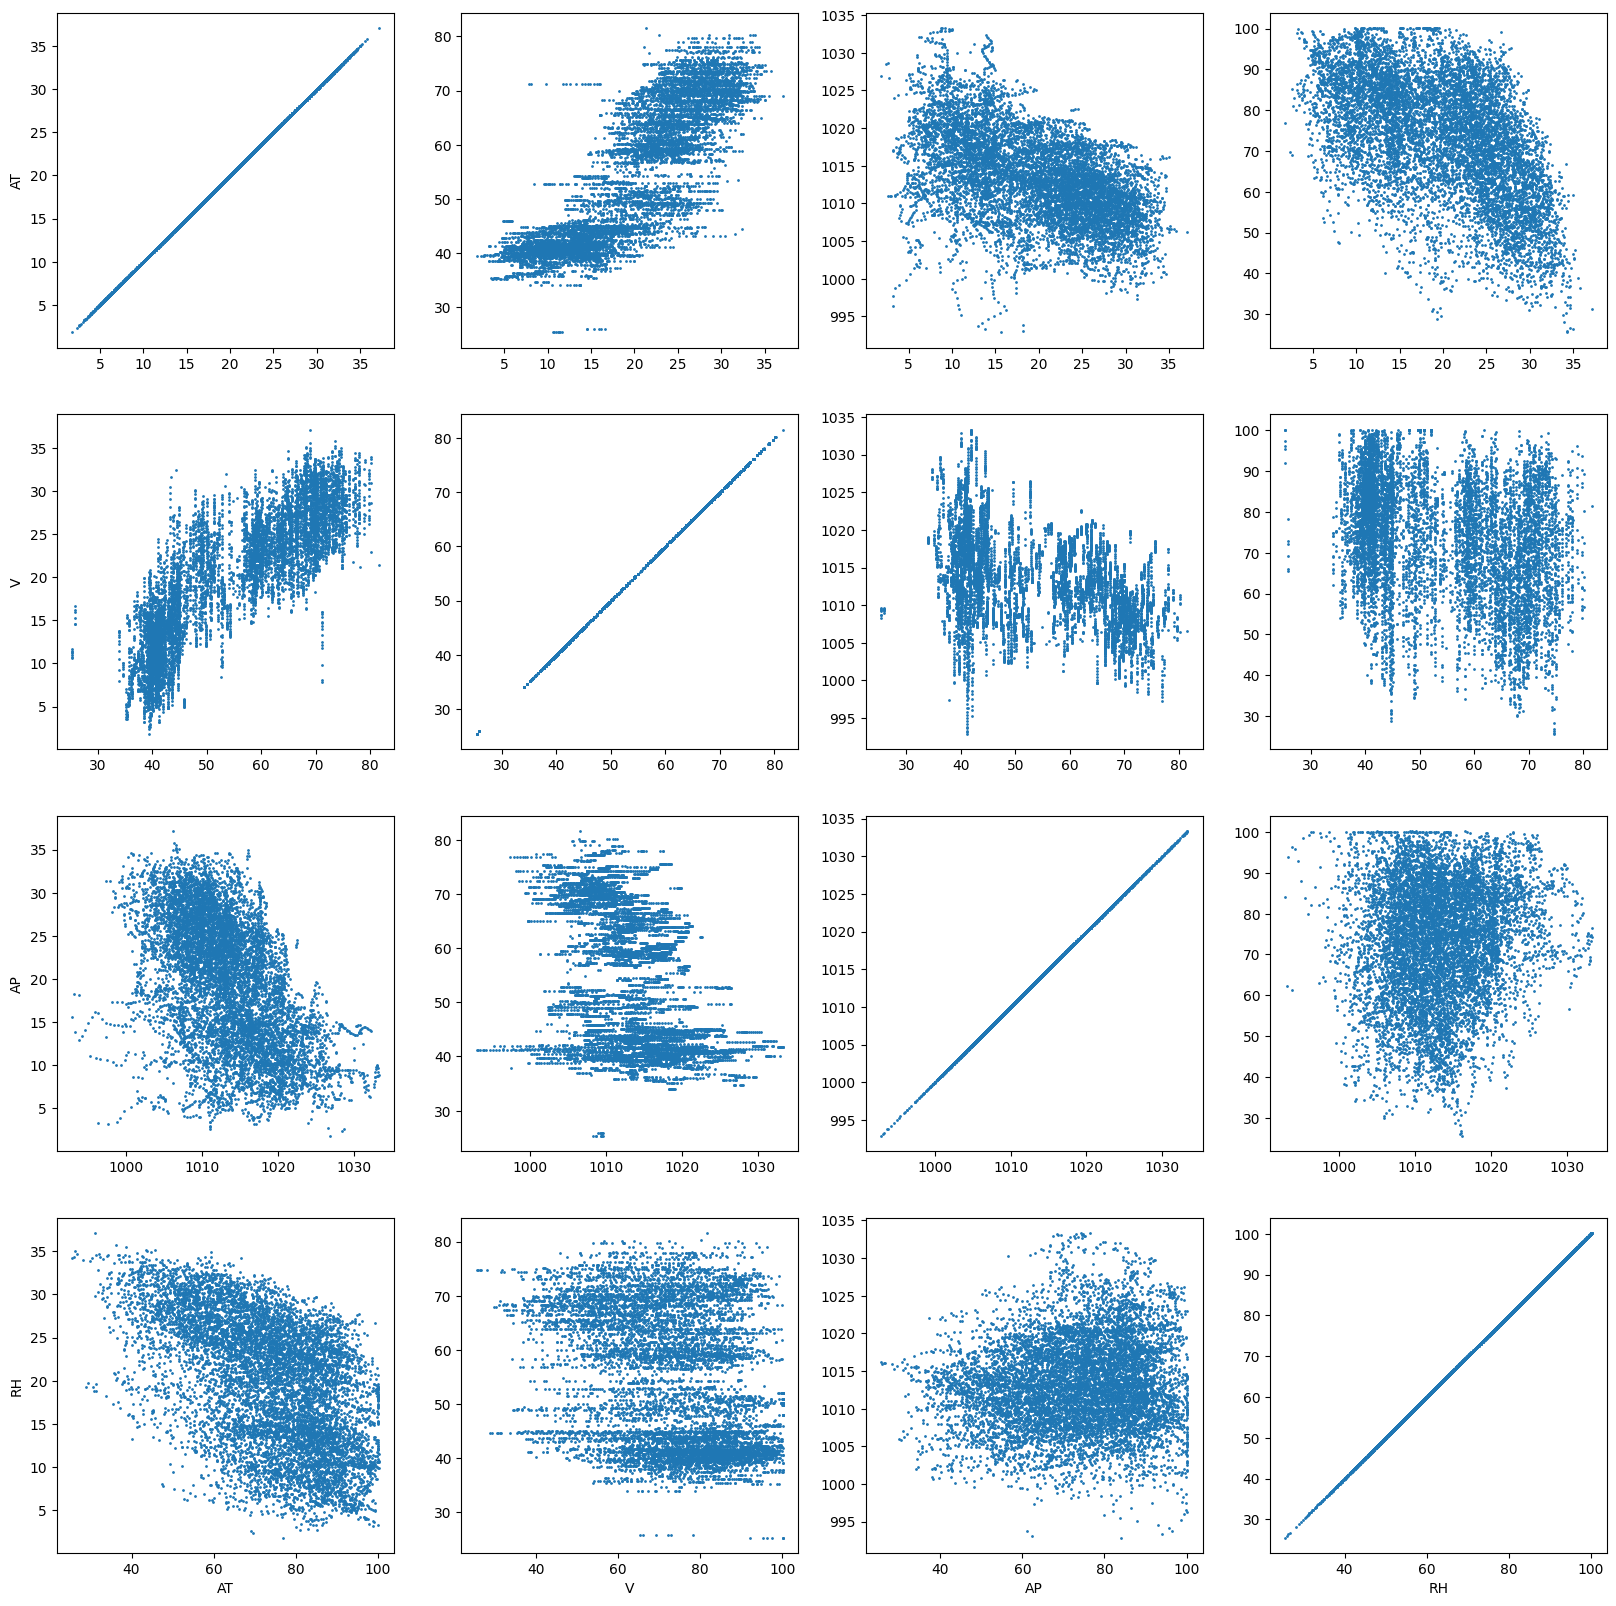

In [37]:
#@title Scatter_plot
fig, ax = plt.subplots(n, n, figsize=(20,20))

for i, x in enumerate(names):
    for j, y in enumerate(names):
        ax[i][j].scatter(df[x], df[y], s=1)
        ax[-1][j].set_xlabel(y)
    ax[i][0].set_ylabel(x)

In [38]:
#@title Устранены дубликаты
df = df.drop_duplicates().reset_index(drop=True)
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9522,16.65,49.69,1014.01,91.00,460.03
9523,13.19,39.18,1023.67,66.78,469.62
9524,31.32,74.33,1012.92,36.48,429.57
9525,24.48,69.45,1013.86,62.39,435.74


In [39]:
#@title Пропущенных значений не обнаружено
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [40]:
#@title Стандартизация
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[names] = scaler.fit_transform(df[names])
df[['PE']] = scaler.fit_transform(df[['PE']])
df

,AT,V,AP,RH,PE
0,0.372521,0.291815,0.771591,0.638204,0.569536
1,0.662040,0.669039,0.671863,0.449330,0.319338
2,0.093484,0.249822,0.476862,0.892493,0.904636
3,0.539660,0.568683,0.429349,0.684718,0.347285
4,0.255241,0.216014,0.404355,0.952547,0.710464
...,...,...,...,...,...
9522,0.420397,0.432918,0.522643,0.877212,0.526755
9523,0.322380,0.245907,0.761693,0.552547,0.653775
9524,0.835977,0.871352,0.495669,0.146381,0.123311
9525,0.642210,0.784520,0.518931,0.493700,0.205033


In [41]:
#@title Удаление выбросов
Q1 = df['RH'].quantile(0.25)
Q3 = df['RH'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['RH']>=upper)[0]
lower_array = np.where(df['RH']<=lower)[0]

df = df.drop(index=upper_array)
df = df.drop(index=lower_array)
df = df.reset_index(drop=True)


Q1 = df['AP'].quantile(0.25)
Q3 = df['AP'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['AP']>=upper)[0]
lower_array = np.where(df['AP']<=lower)[0]

df = df.drop(index=upper_array)
df = df.drop(index=lower_array)
df = df.reset_index(drop=True)

df

,AT,V,AP,RH,PE
0,0.372521,0.291815,0.771591,0.638204,0.569536
1,0.662040,0.669039,0.671863,0.449330,0.319338
2,0.093484,0.249822,0.476862,0.892493,0.904636
3,0.539660,0.568683,0.429349,0.684718,0.347285
4,0.255241,0.216014,0.404355,0.952547,0.710464
...,...,...,...,...,...
9418,0.420397,0.432918,0.522643,0.877212,0.526755
9419,0.322380,0.245907,0.761693,0.552547,0.653775
9420,0.835977,0.871352,0.495669,0.146381,0.123311
9421,0.642210,0.784520,0.518931,0.493700,0.205033


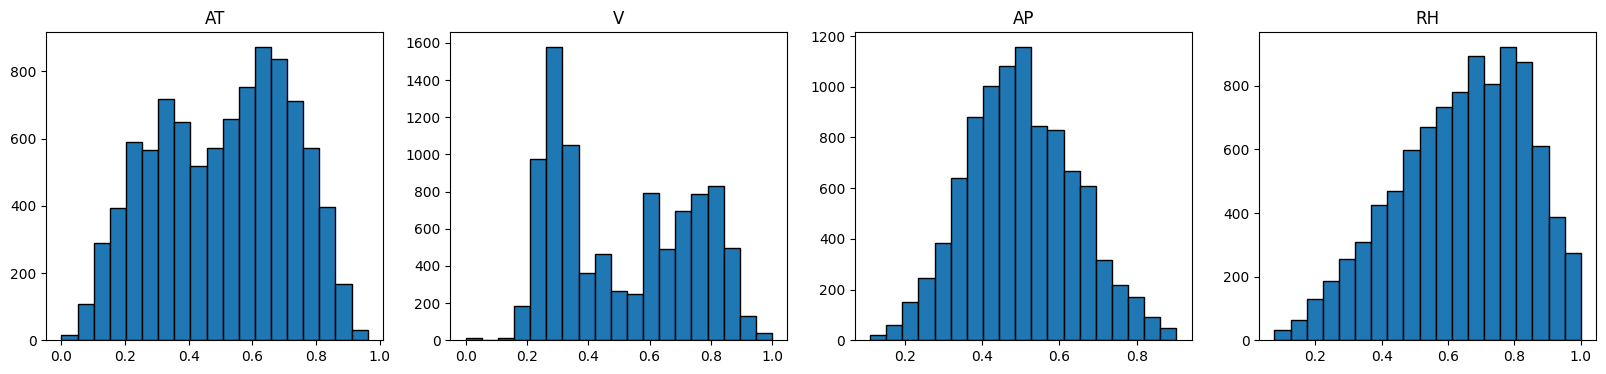

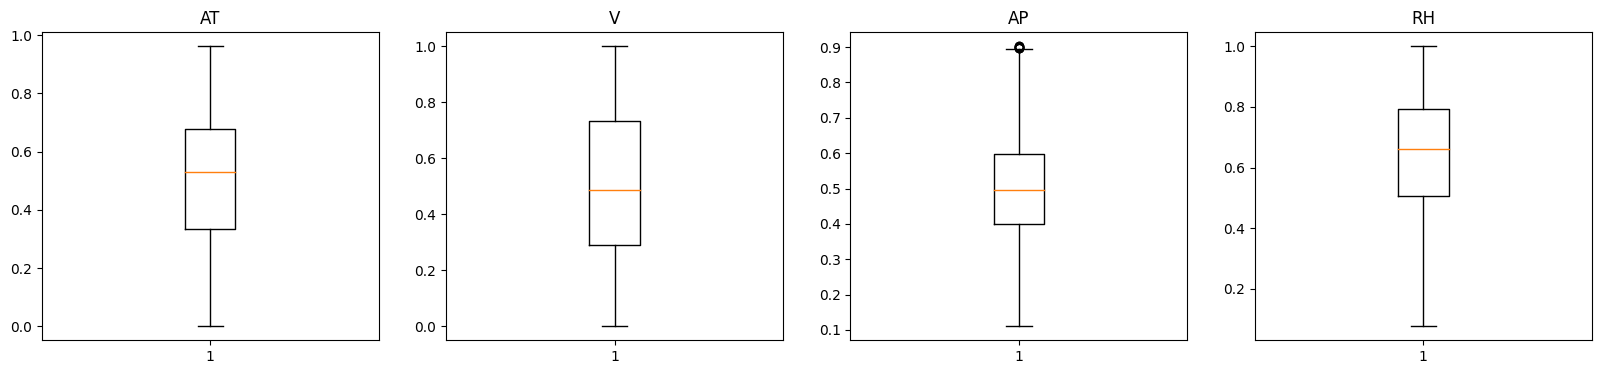

In [42]:
#@title Гистограммы и Box-and-Whisker
fig, ax = plt.subplots(1, n, figsize=(20,4))
for i in range(n):
    x = df[names[i]].to_numpy()
    ax[i].hist(x, bins=np.linspace(min(x), max(x), 20), edgecolor='black')
    ax[i].set_title(names[i])

fig, ax = plt.subplots(1, n, figsize=(20,4))
for i in range(n):
    x = df[names[i]].to_numpy()
    ax[i].boxplot(x)
    ax[i].set_title(names[i])

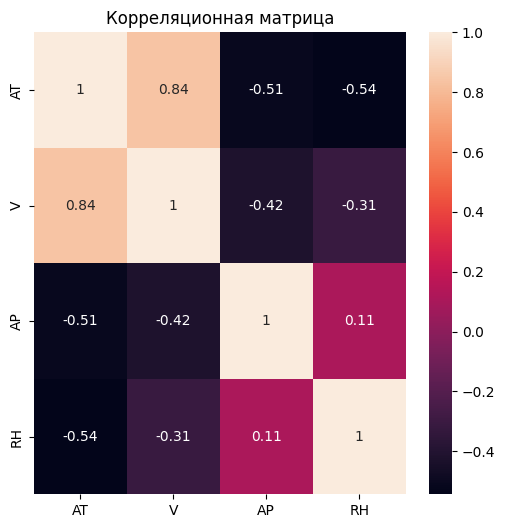

In [43]:
#@title Корреляционная матрица
corr_matrix = df.loc[:, names].corr()

fig, ax = plt.subplots(1, 1, figsize=(6,6))
hm = sns.heatmap(corr_matrix, annot=True)
hm.set_title('Корреляционная матрица');

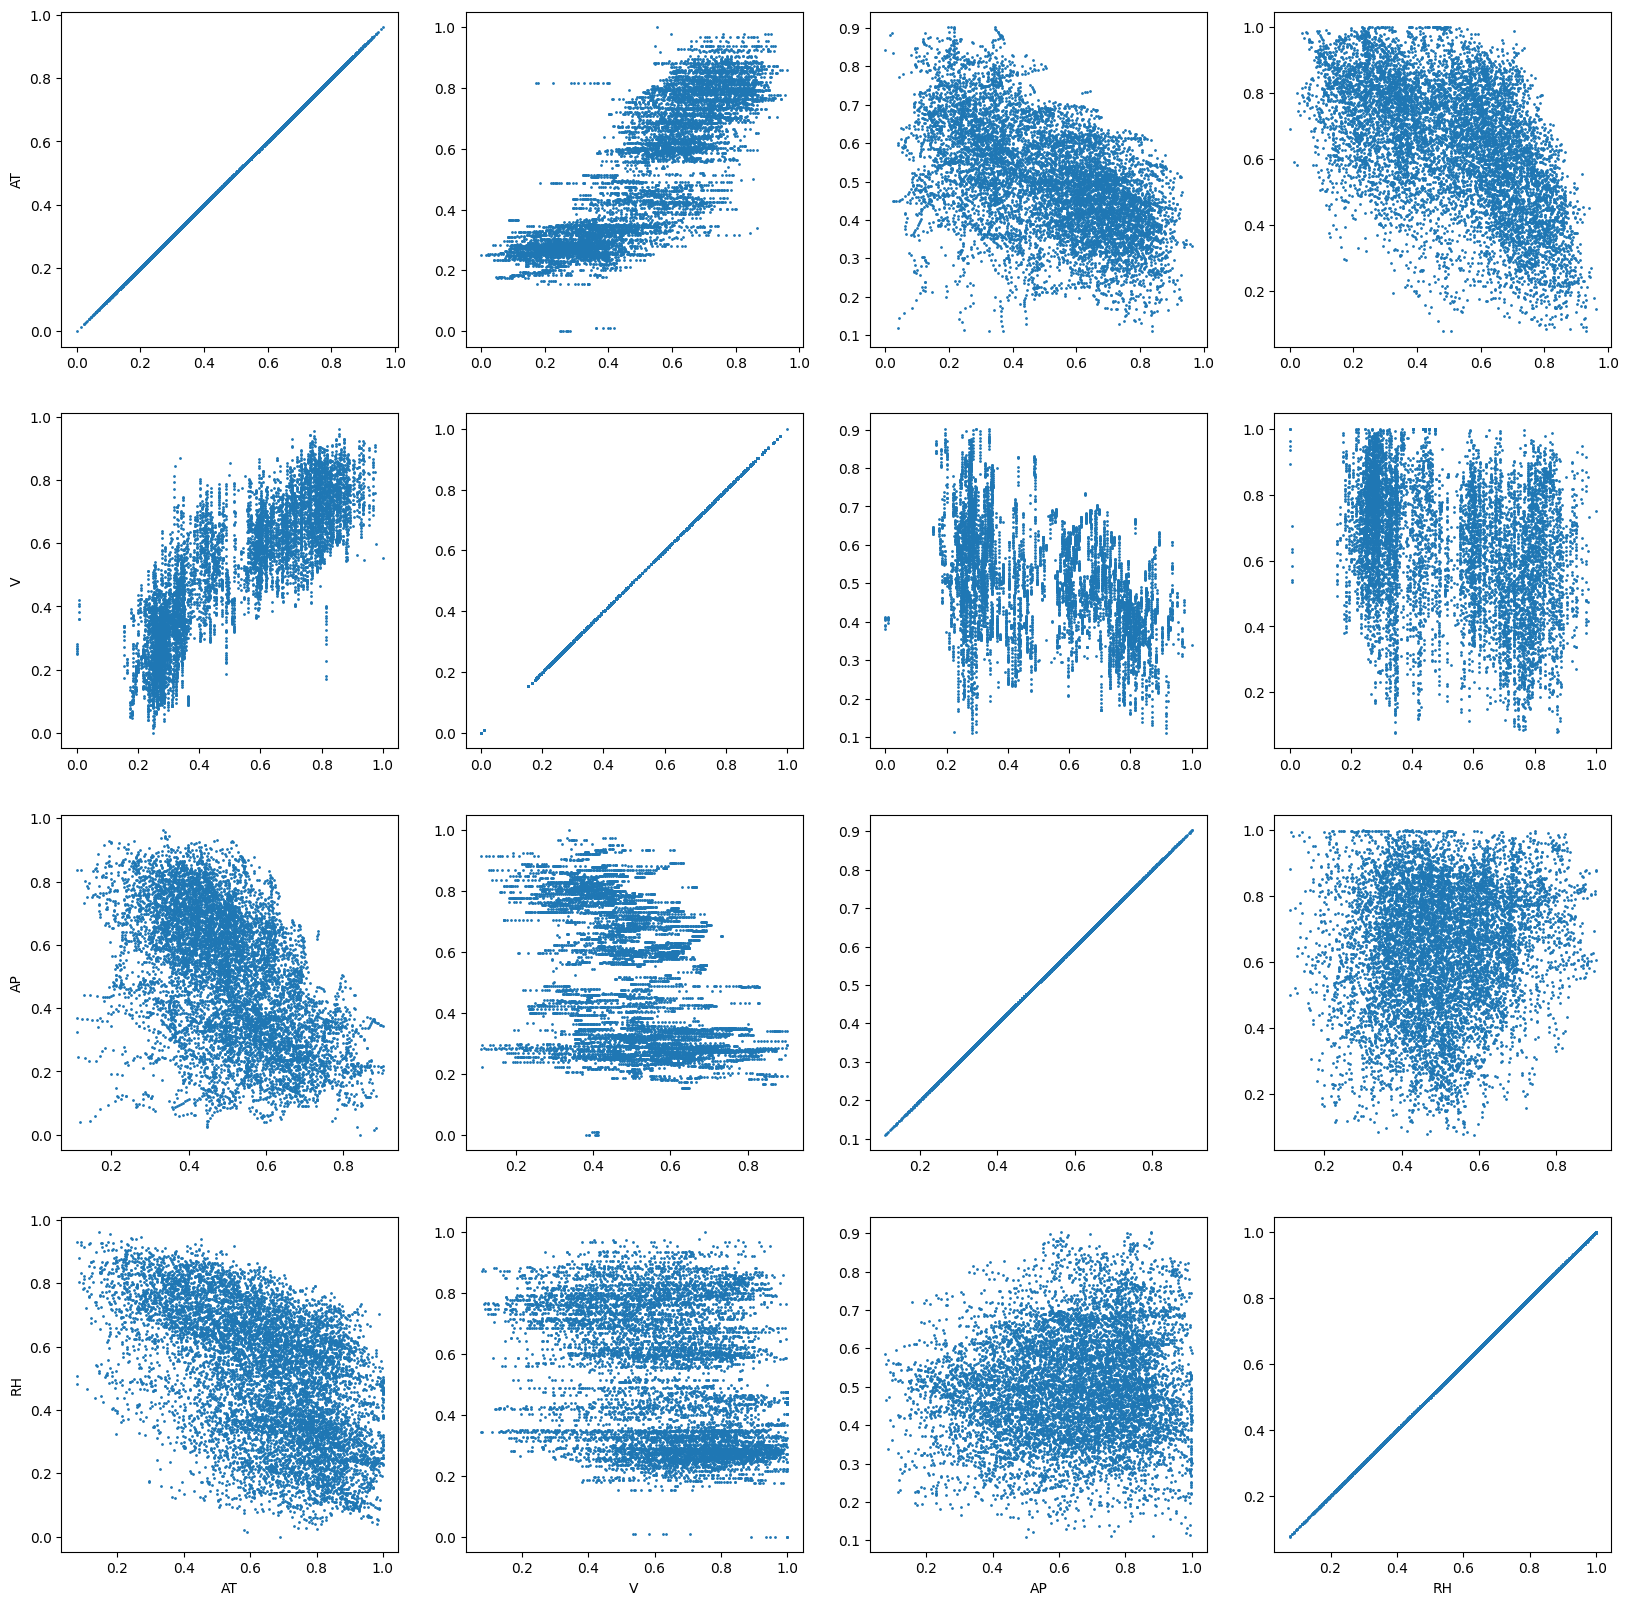

In [44]:
#@title Scatter_plot
fig, ax = plt.subplots(n, n, figsize=(20,20))

for i, x in enumerate(names):
    for j, y in enumerate(names):
        ax[i][j].scatter(df[x], df[y], s=1)
        ax[-1][j].set_xlabel(y)
    ax[i][0].set_ylabel(x)

In [46]:
train_percent = 0.6
valid_percent = 0.3
test_percent = 0.1
l = len(df)
df_train = df[:int(train_percent*l)].reset_index(drop=True)
df_valid = df[int(train_percent*l):int((train_percent+valid_percent)*l)].reset_index(drop=True)
df_test = df[int((train_percent+valid_percent)*l):].reset_index(drop=True)

_data_train_x = df_train[['AT', 'V', 'AP', 'RH']].to_numpy()
_data_train_y = df_train[['PE']].to_numpy()

_data_validation_x = df_valid[['AT', 'V', 'AP', 'RH']].to_numpy()
_data_validation_y = df_valid[['PE']].to_numpy()

_data_test_x = df_test[['AT', 'V', 'AP', 'RH']].to_numpy()
_data_test_y = df_test[['PE']].to_numpy()

In [47]:
# Метод инициализации Хавьера
kernel_initializer = keras.initializers.GlorotNormal(seed=1)
bias_initializer = keras.initializers.GlorotNormal(seed=1)

firstLayerAmountOfNeurons = 20
secondLayerAmountOfNeurons = 10

learning_rate = 0.01
batch_size = len(df_train)

In [48]:
inputLayer = tf.keras.layers.Input(shape=(len(names),))

firstHiddenLayer = tf.keras.layers.Dense(
    firstLayerAmountOfNeurons,
    activation        ='sigmoid',
    kernel_initializer=kernel_initializer,
    bias_initializer  =bias_initializer,
    name              ='First_Hidden'
)(inputLayer)

secondHiddenLayer = tf.keras.layers.Dense(
    secondLayerAmountOfNeurons,
    activation        ='sigmoid',
    kernel_initializer=kernel_initializer,
    bias_initializer  =bias_initializer,
    name              ='Second_Hidden'
)(firstHiddenLayer)

outputLayer = tf.keras.layers.Dense(
    1,
    activation='linear',
    name='Output'
)(secondHiddenLayer)

model = keras.Model(inputs=inputLayer, outputs=outputLayer)

model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=learning_rate
    ),
    loss='mse'
)

model.summary()
model.save('./models/model_sgd_1.h5')
model.save_weights('./weights/weight_1')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 First_Hidden (Dense)        (None, 20)                100       
                                                                 
 Second_Hidden (Dense)       (None, 10)                210       
                                                                 
 Output (Dense)              (None, 1)                 11        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
#@title SGD
l_rates = [
    0.00001,
    0.0001,
    0.001,
    0.01,
    0.1,
][::-1]

amountOfEpochs = 100

errors = dict()

for lr in l_rates:
    errors[lr] = {
        'Train':[],
        'Validation':[],
        'Test': [],
        'Epoch':[]
    }

    model.load_weights('./weights/weight_1')
    model.compile(
        optimizer=tf.keras.optimizers.SGD(
            learning_rate=lr,
        ),
        loss='mse'
    )

    currentEpoch = 1

    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x,
            y              =_data_train_y,
            epochs         =1,
            validation_data=(_data_validation_x, _data_validation_y),
            batch_size=batch_size
        )

        errors[lr]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
        errors[lr]['Validation'].append(model.evaluate(_data_validation_x, _data_validation_y, batch_size=batch_size, verbose=0))
        errors[lr]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
        errors[lr]['Epoch'     ].append(currentEpoch)

        currentEpoch += 1

1/1 [==============================] - 0s 85ms/step - loss: 0.2413 - val_loss: 0.2393


learning_rate: 	0.1
Train loss: 	0.046330831944942474
Test loss: 	0.04487278312444687

learning_rate: 	0.01
Train loss: 	0.04871899634599686
Test loss: 	0.04723811894655228

learning_rate: 	0.001
Train loss: 	0.08771901577711105
Test loss: 	0.08376360684633255

learning_rate: 	0.0001
Train loss: 	0.21535952389240265
Test loss: 	0.20875123143196106

learning_rate: 	1e-05
Train loss: 	0.24129116535186768
Test loss: 	0.23429767787456512



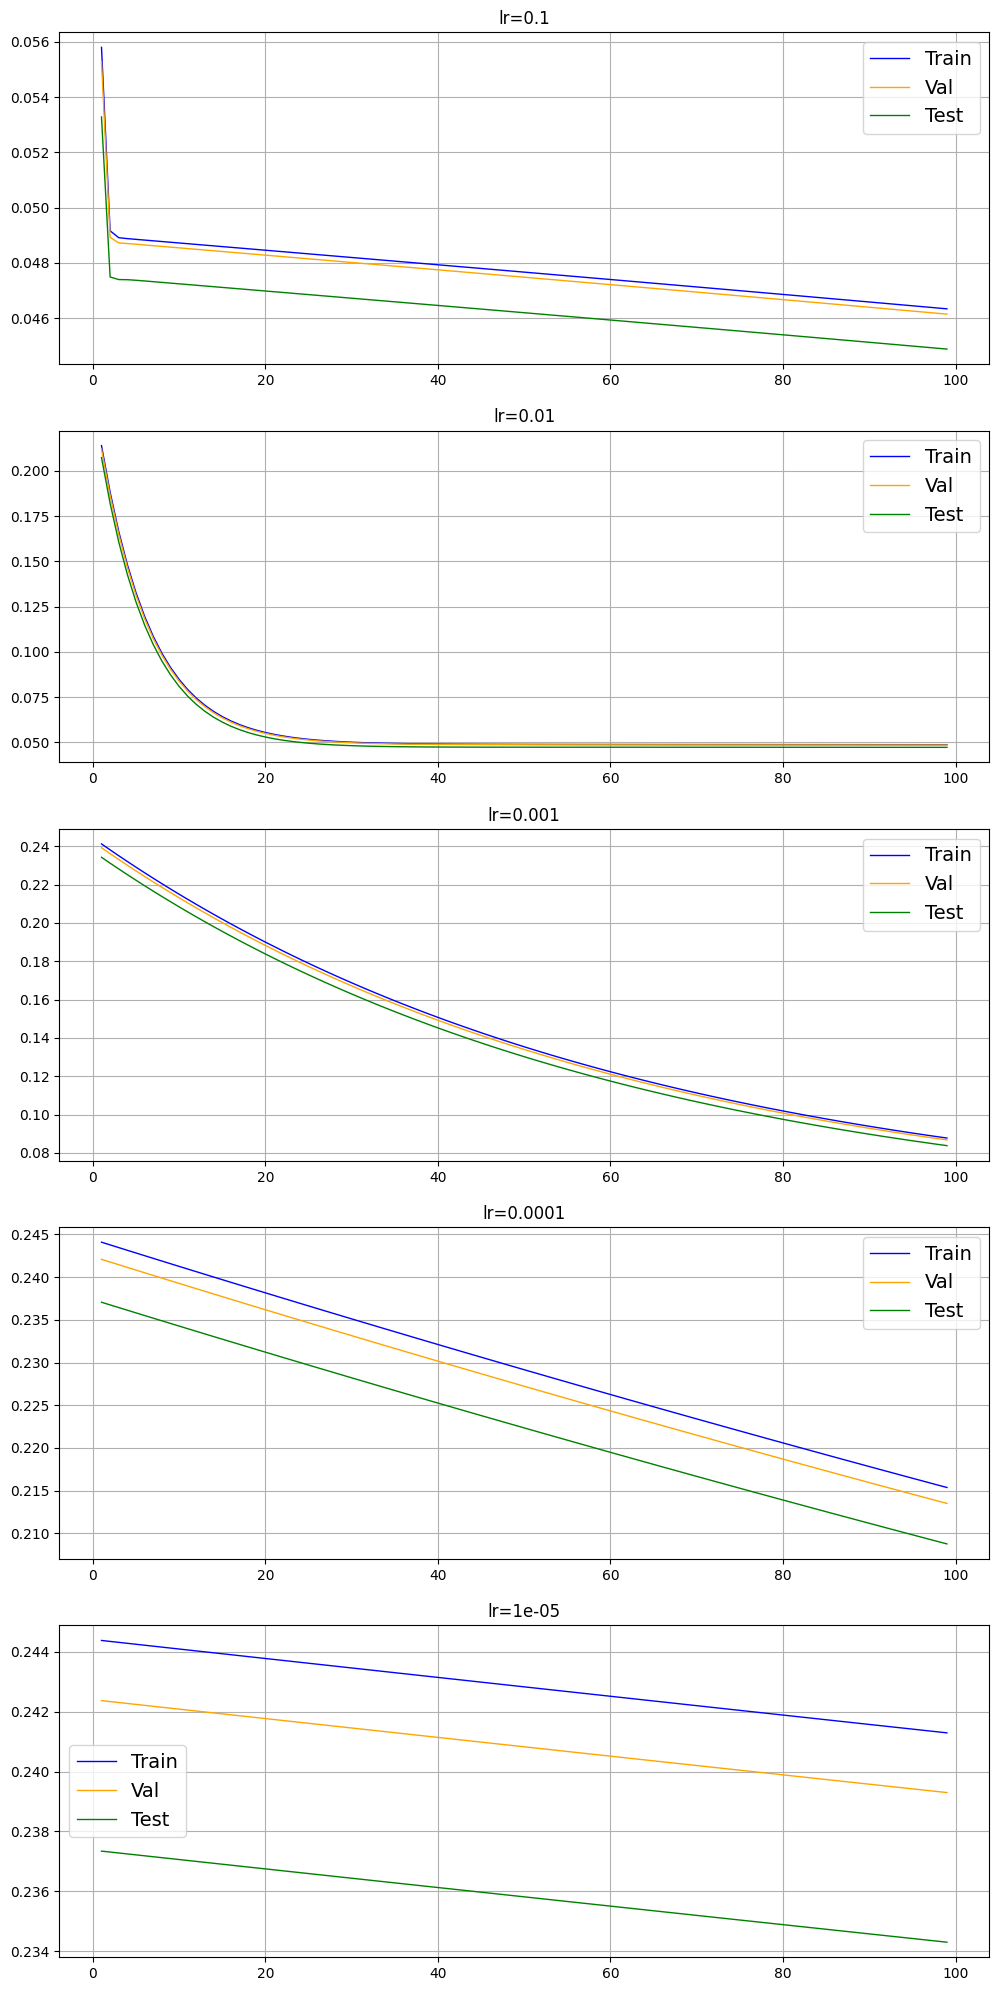

In [50]:
#@title plot
fig8, ax8 = plt.subplots(5, 1)
fig8.set_size_inches((12, 25))

for i in range(5):
    ax8[i].plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Train']),      label='Train',      linewidth=1, color="blue")
    ax8[i].plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Validation']), label='Val',        linewidth=1, color="orange")
    ax8[i].plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Test']),       label='Test',       linewidth=1, color="green")
    ax8[i].legend(fontsize=14)
    ax8[i].grid()
    ax8[i].set_title(f'lr={l_rates[i]}')
    train_loss = np.array(errors[l_rates[i]]['Train'])[-1]
    test_loss = np.array(errors[l_rates[i]]['Test'])[-1]
    print(f'learning_rate: \t{l_rates[i]}')
    print(f'Train loss: \t{train_loss}')
    print(f'Test loss: \t{test_loss}\n')

#plt.savefig(f'./Graphs/GD_lr={l_rates[i]}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights('./weights/weight_GD_1')

In [51]:
#@title GDM
momentums = [
    0.0,
    0.3,
    0.7,
    0.9
]

amountOfEpochs = 100
lr = 0.1

errors_GDM = dict()

for momentum in momentums:
    errors_GDM[momentum] = {
        'Train':[],
        'Validation':[],
        'Test': [],
        'Epoch':[]
    }

    model.load_weights('./weights/weight_1')
    model.compile(
        optimizer=tf.keras.optimizers.SGD(
            lr=lr,
            momentum=momentum
        ),
        loss='mse'
    )

    currentEpoch = 1

    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x,
            y              =_data_train_y,
            epochs         =1,
            validation_data=(_data_validation_x, _data_validation_y),
            batch_size=batch_size
        )

        errors_GDM[momentum]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
        errors_GDM[momentum]['Validation'].append(model.evaluate(_data_validation_x, _data_validation_y, batch_size=batch_size, verbose=0))
        errors_GDM[momentum]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
        errors_GDM[momentum]['Epoch'     ].append(currentEpoch)

        currentEpoch += 1

1/1 [==============================] - 0s 86ms/step - loss: 0.0487 - val_loss: 0.0485


1/1 [==============================] - 0s 80ms/step - loss: 0.0486 - val_loss: 0.0484


1/1 [==============================] - 0s 88ms/step - loss: 0.0481 - val_loss: 0.0480


1/1 [==============================] - 0s 83ms/step - loss: 0.0467 - val_loss: 0.0465


momentum: 	0.0
Train loss: 	0.04871899634599686
Test loss: 	0.04723811894655228

momentum: 	0.3
Train loss: 	0.04860920459032059
Test loss: 	0.047130484133958817

momentum: 	0.7
Train loss: 	0.04813244938850403
Test loss: 	0.04665800556540489

momentum: 	0.9
Train loss: 	0.04663694277405739
Test loss: 	0.04520593211054802



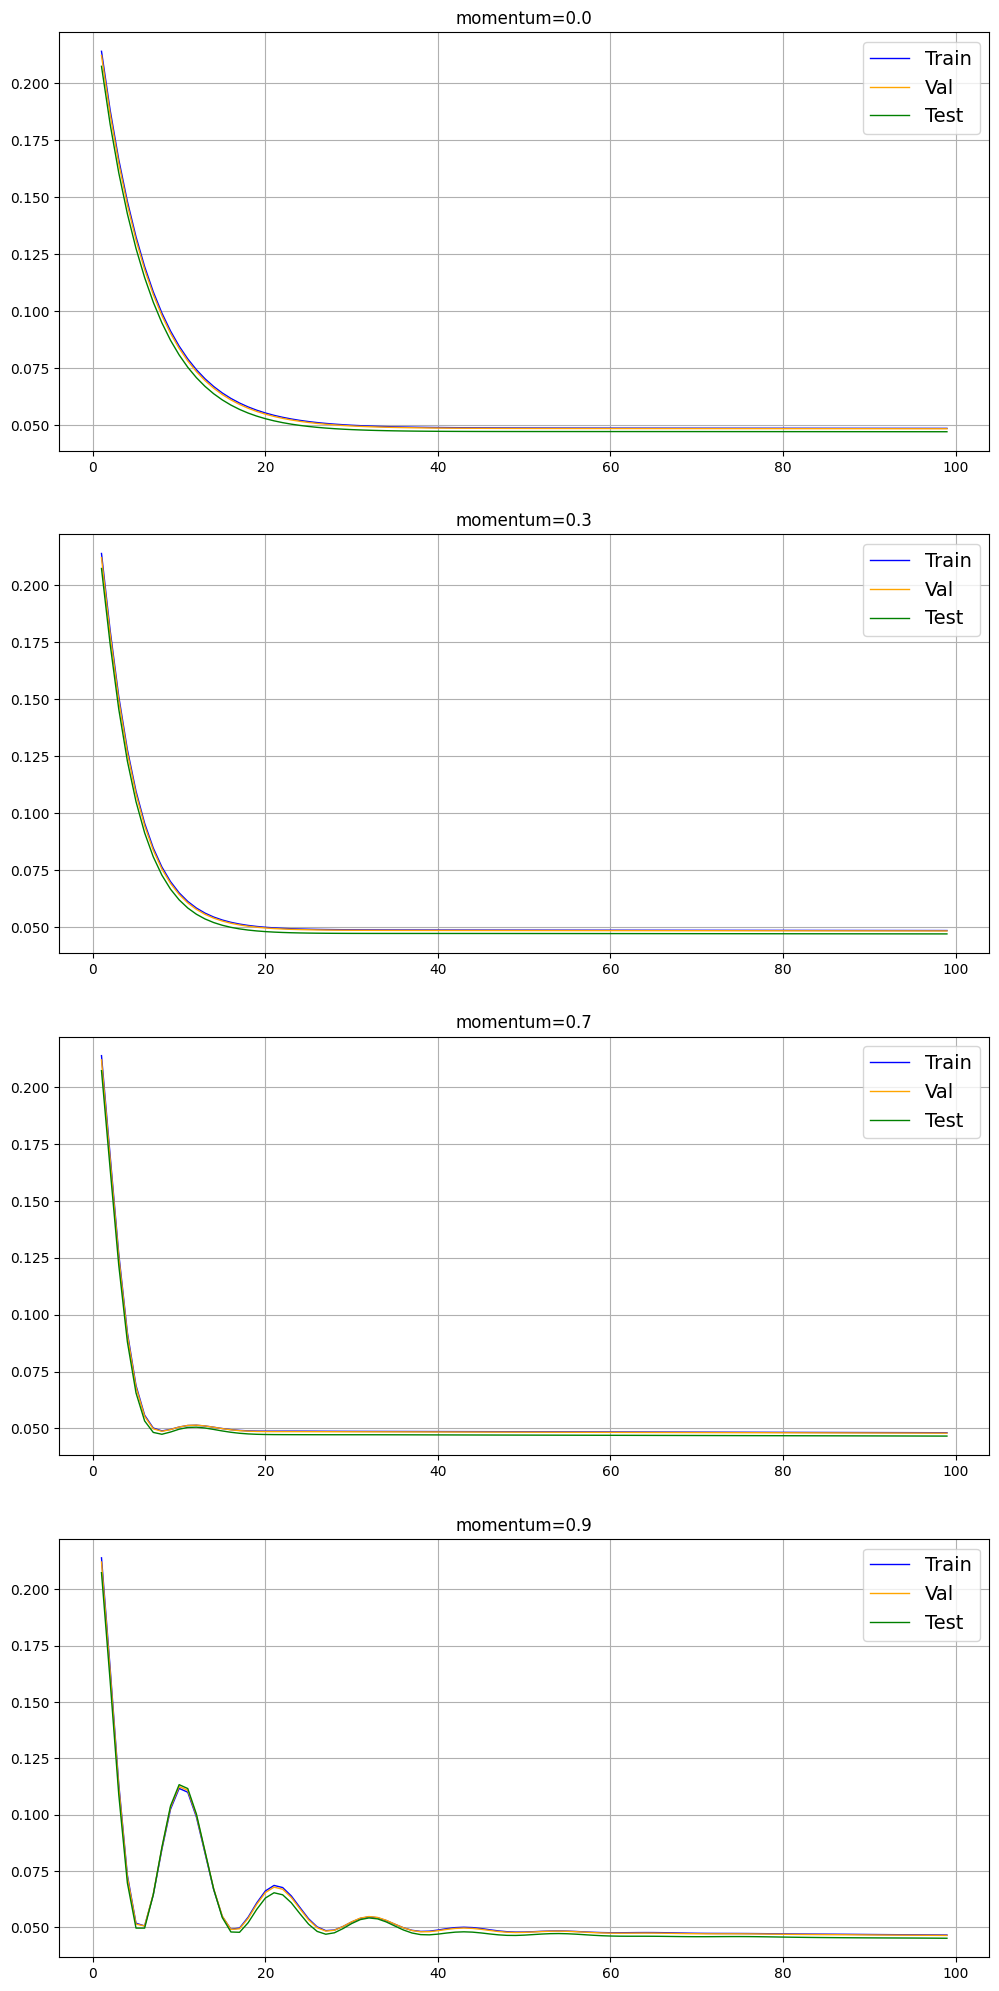

In [53]:
fig9, ax9 = plt.subplots(len(momentums), 1)
fig9.set_size_inches((12, 25))

for i in range(len(momentums)):
    ax9[i].plot(errors_GDM[momentums[i]]['Epoch'], np.array(errors_GDM[momentums[i]]['Train']),      label='Train',      linewidth=1, color="blue")
    ax9[i].plot(errors_GDM[momentums[i]]['Epoch'], np.array(errors_GDM[momentums[i]]['Validation']), label='Val',        linewidth=1, color="orange")
    ax9[i].plot(errors_GDM[momentums[i]]['Epoch'], np.array(errors_GDM[momentums[i]]['Test']),       label='Test',       linewidth=1, color="green")
    ax9[i].legend(fontsize=14)
    ax9[i].grid()
    ax9[i].set_title(f'momentum={momentums[i]}')
    train_loss = np.array(errors_GDM[momentums[i]]['Train'])[-1]
    test_loss = np.array(errors_GDM[momentums[i]]['Test'])[-1]
    print(f'momentum: \t{momentums[i]}')
    print(f'Train loss: \t{train_loss}')
    print(f'Test loss: \t{test_loss}\n')

#plt.savefig(f'./Graphs/GDM_lr={lr}_momentrum={momentums[i]}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights('./weights/weight_GDM_1')

In [54]:
#@title NAG
momentums = [
    0.0,
    0.3,
    0.7,
    0.9
]

amountOfEpochs = 100
lr = 0.01

errors_NAG = dict()

for momentum in momentums:
    errors_NAG[momentum] = {
        'Train':[],
        'Validation':[],
        'Test': [],
        'Epoch':[]
    }

    model.load_weights('./weights/weight_1')
    model.compile(
        optimizer=tf.keras.optimizers.SGD(
            lr=lr,
            momentum=momentum,
            nesterov=True
        ),
        loss='mse'
    )

    currentEpoch = 1

    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x,
            y              =_data_train_y,
            epochs         =1,
            validation_data=(_data_validation_x, _data_validation_y),
            batch_size=batch_size
        )

        errors_NAG[momentum]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
        errors_NAG[momentum]['Validation'].append(model.evaluate(_data_validation_x, _data_validation_y, batch_size=batch_size, verbose=0))
        errors_NAG[momentum]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
        errors_NAG[momentum]['Epoch'     ].append(currentEpoch)

        currentEpoch += 1

1/1 [==============================] - 0s 87ms/step - loss: 0.0487 - val_loss: 0.0485


1/1 [==============================] - 0s 86ms/step - loss: 0.0486 - val_loss: 0.0484


1/1 [==============================] - 0s 88ms/step - loss: 0.0481 - val_loss: 0.0479


1/1 [==============================] - 0s 158ms/step - loss: 0.0466 - val_loss: 0.0464


momentum: 	0.0
Train loss: 	0.04871899634599686
Test loss: 	0.04723811894655228

momentum: 	0.3
Train loss: 	0.048608046025037766
Test loss: 	0.047129325568675995

momentum: 	0.7
Train loss: 	0.0481257289648056
Test loss: 	0.04665134847164154

momentum: 	0.9
Train loss: 	0.04658342897891998
Test loss: 	0.045123711228370667



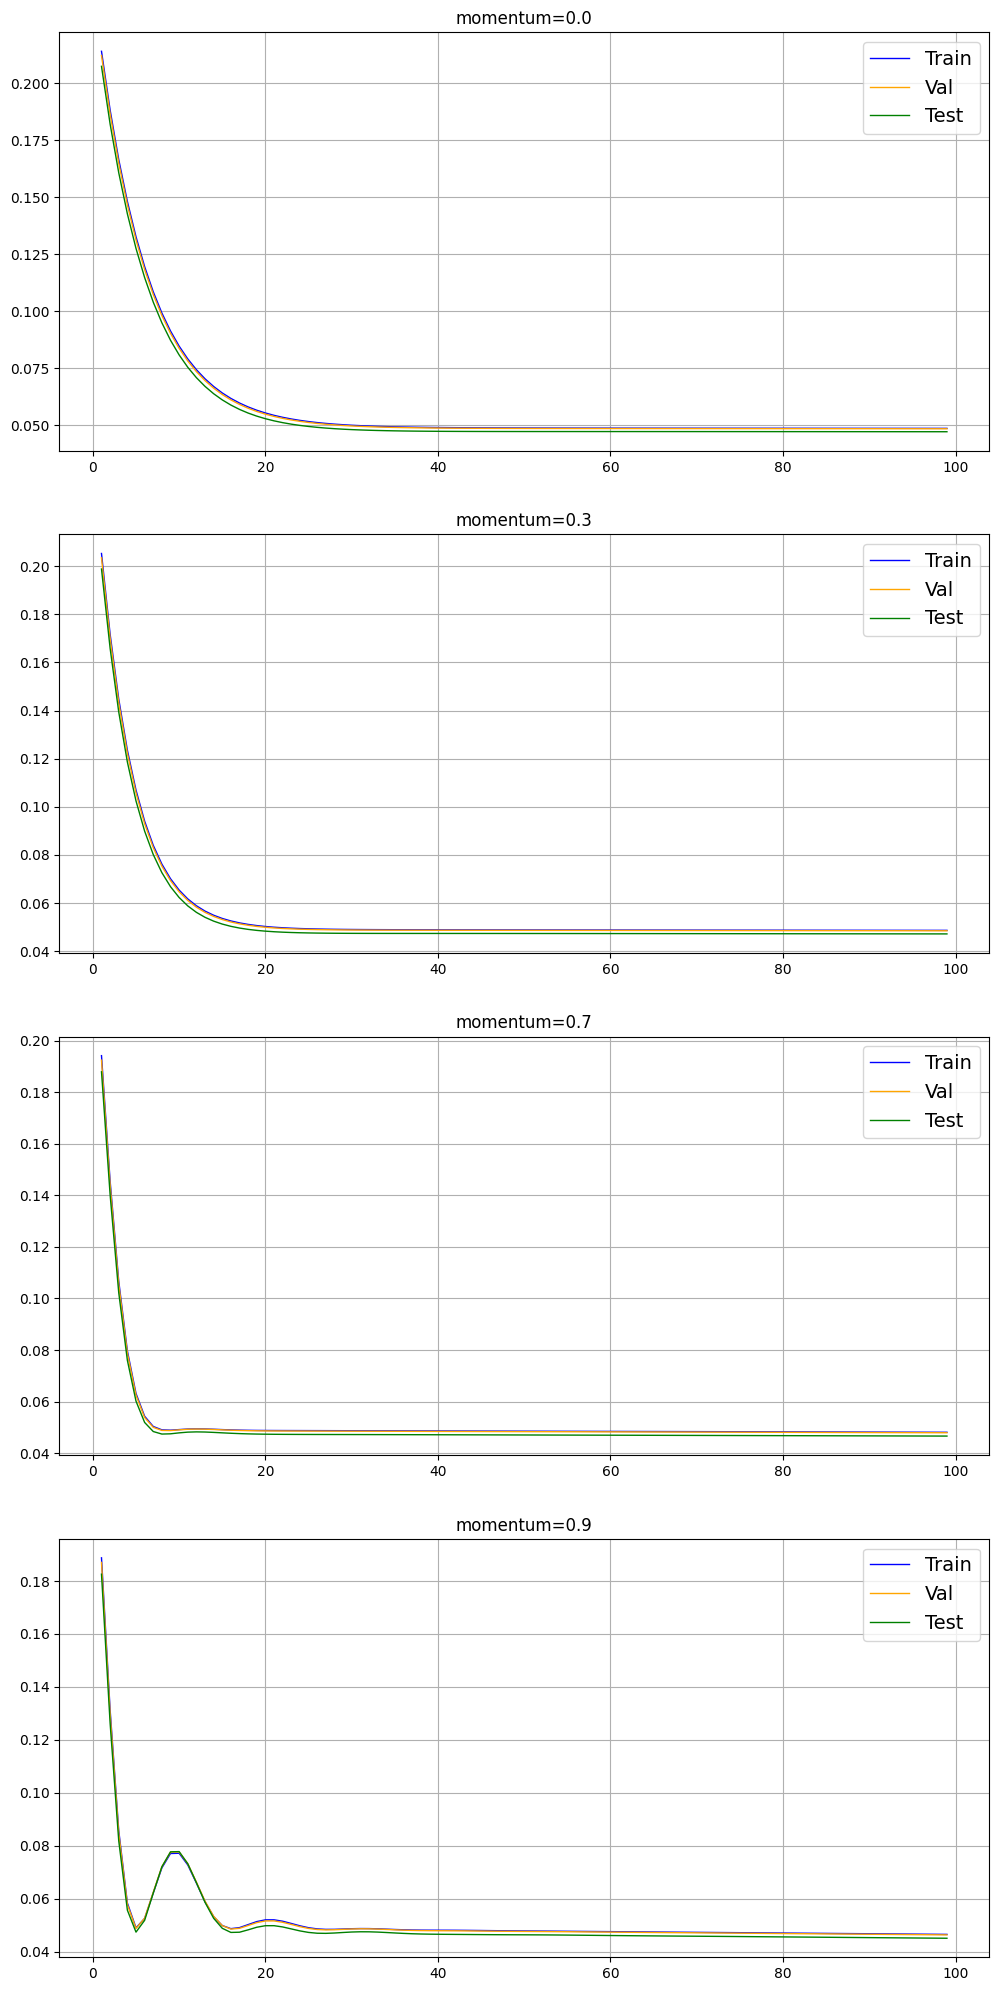

In [55]:
fig9, ax9 = plt.subplots(len(momentums), 1)
fig9.set_size_inches((12, 25))

for i in range(len(momentums)):
    ax9[i].plot(errors_NAG[momentums[i]]['Epoch'], np.array(errors_NAG[momentums[i]]['Train']),      label='Train',      linewidth=1, color="blue")
    ax9[i].plot(errors_NAG[momentums[i]]['Epoch'], np.array(errors_NAG[momentums[i]]['Validation']), label='Val',        linewidth=1, color="orange")
    ax9[i].plot(errors_NAG[momentums[i]]['Epoch'], np.array(errors_NAG[momentums[i]]['Test']),       label='Test',       linewidth=1, color="green")
    ax9[i].legend(fontsize=14)
    ax9[i].grid()
    ax9[i].set_title(f'momentum={momentums[i]}')
    train_loss = np.array(errors_NAG[momentums[i]]['Train'])[-1]
    test_loss = np.array(errors_NAG[momentums[i]]['Test'])[-1]
    print(f'momentum: \t{momentums[i]}')
    print(f'Train loss: \t{train_loss}')
    print(f'Test loss: \t{test_loss}\n')

#plt.savefig(f'./Graphs/GDM_lr={lr}_momentrum={momentums[i]}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights('./weights/weight_NAG_1')

In [57]:
df.to_csv('/content/drive/MyDrive/НС_БДЗ/sample_data/data_modified.csv', sep=',')
df

,AT,V,AP,RH,PE
0,0.372521,0.291815,0.771591,0.638204,0.569536
1,0.662040,0.669039,0.671863,0.449330,0.319338
2,0.093484,0.249822,0.476862,0.892493,0.904636
3,0.539660,0.568683,0.429349,0.684718,0.347285
4,0.255241,0.216014,0.404355,0.952547,0.710464
...,...,...,...,...,...
9418,0.420397,0.432918,0.522643,0.877212,0.526755
9419,0.322380,0.245907,0.761693,0.552547,0.653775
9420,0.835977,0.871352,0.495669,0.146381,0.123311
9421,0.642210,0.784520,0.518931,0.493700,0.205033


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch

In [59]:
df = pd.read_csv('/content/drive/MyDrive/НС_БДЗ/sample_data/data_modified.csv').drop(columns=['Unnamed: 0'])
df

,AT,V,AP,RH,PE
0,0.372521,0.291815,0.771591,0.638204,0.569536
1,0.662040,0.669039,0.671863,0.449330,0.319338
2,0.093484,0.249822,0.476862,0.892493,0.904636
3,0.539660,0.568683,0.429349,0.684718,0.347285
4,0.255241,0.216014,0.404355,0.952547,0.710464
...,...,...,...,...,...
9418,0.420397,0.432918,0.522643,0.877212,0.526755
9419,0.322380,0.245907,0.761693,0.552547,0.653775
9420,0.835977,0.871352,0.495669,0.146381,0.123311
9421,0.642210,0.784520,0.518931,0.493700,0.205033


In [60]:
names = df.columns.values.tolist()[:-1]
n = len(names)
names

['AT', 'V', 'AP', 'RH']

In [61]:
train_percent = 0.6
valid_percent = 0.3
test_percent = 0.1
l = len(df)
df_train = df[:int(train_percent*l)].reset_index(drop=True)
df_valid = df[int(train_percent*l):int((train_percent+valid_percent)*l)].reset_index(drop=True)
df_test = df[int((train_percent+valid_percent)*l):].reset_index(drop=True)

_data_train_x = df_train[['AT', 'V', 'AP', 'RH']].to_numpy()
_data_train_y = df_train[['PE']].to_numpy()

_data_validation_x = df_valid[['AT', 'V', 'AP', 'RH']].to_numpy()
_data_validation_y = df_valid[['PE']].to_numpy()

_data_test_x = df_test[['AT', 'V', 'AP', 'RH']].to_numpy()
_data_test_y = df_test[['PE']].to_numpy()

In [62]:
X_train = torch.tensor(_data_train_x, dtype=torch.float32)
Y_train = torch.tensor(_data_train_y, dtype=torch.float32)

X_valid = torch.tensor(_data_validation_x, dtype=torch.float32)
Y_valid = torch.tensor(_data_validation_y, dtype=torch.float32)

X_test = torch.tensor(_data_test_x, dtype=torch.float32)
Y_test = torch.tensor(_data_test_y, dtype=torch.float32)

In [63]:
firstLayerAmountOfNeurons = 20
secondLayerAmountOfNeurons = 10
batch_size = len(df_train)
learning_rate = 0.1

In [64]:
class Regressor(nn.Module):
    def __init__(self):
        super(Regressor, self).__init__()
        self.first_layer = nn.Linear(4, firstLayerAmountOfNeurons)
        self.second_layer = nn.Linear(firstLayerAmountOfNeurons, secondLayerAmountOfNeurons)
        self.final_layer = nn.Linear(secondLayerAmountOfNeurons, 1)

    def forward(self, X_batch):
        layer_out = F.sigmoid(self.first_layer(X_batch))
        layer_out = F.sigmoid(self.second_layer(layer_out))
        return self.final_layer(layer_out)

In [65]:
#@title SGD

torch.manual_seed(1)
epochs = 100

regressor = Regressor()
mse_loss = nn.MSELoss()
optimizer = torch.optim.SGD(params=regressor.parameters(), lr=learning_rate)

train_loss=[]
valid_loss=[]
test_loss=[]

for i in range(epochs):
  preds = regressor(X_train)
  loss = mse_loss(preds, Y_train)

  preds1 = regressor(X_valid)
  loss1 = mse_loss(preds1, Y_valid)

  preds2 = regressor(X_test)
  loss2 = mse_loss(preds2, Y_test)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  train_loss.append(loss.data.numpy())
  valid_loss.append(loss1.data.numpy())
  test_loss.append(loss2.data.numpy())

learning_rate: 	0.1
Train loss: 	0.04994847998023033
Test loss: 	0.048581257462501526



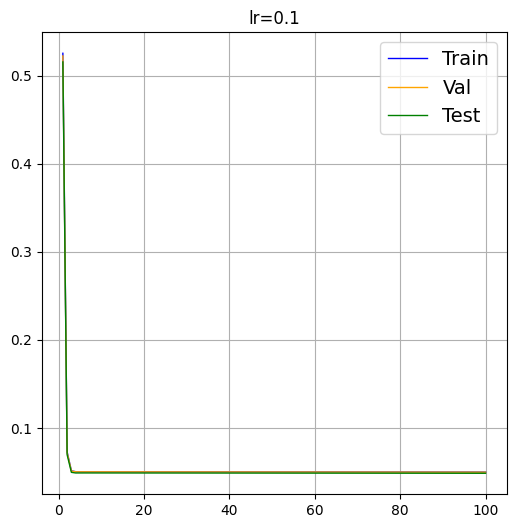

In [66]:
#@title plot
fig8, ax8 = plt.subplots(1, 1)
fig8.set_size_inches((6, 6))

ax8.plot(np.linspace(1, epochs, epochs), train_loss,      label='Train',      linewidth=1, color="blue")
ax8.plot(np.linspace(1, epochs, epochs), valid_loss, label='Val',        linewidth=1, color="orange")
ax8.plot(np.linspace(1, epochs, epochs), test_loss,       label='Test',       linewidth=1, color="green")
ax8.set_title(f'lr={learning_rate}')
ax8.legend(fontsize=14)
ax8.grid()

print(f'learning_rate: \t{learning_rate}')
print(f'Train loss: \t{train_loss[-1]}')
print(f'Test loss: \t{test_loss[-1]}\n')

In [69]:
#@title Флетчер Ривз
#!pip install ncg_optimizer
import ncg_optimizer

torch.manual_seed(1)
epochs = 1000

regressor = Regressor()
mse_loss = nn.MSELoss()
optimizer = ncg_optimizer.BASIC(regressor.parameters(), method = 'FR', lr=learning_rate)

train_loss=[]
valid_loss=[]
test_loss=[]

def closure():
    optimizer.zero_grad()
    mse_loss(regressor(X_train), Y_train).backward()
    return loss

for i in range(epochs):
  preds = regressor(X_train)
  loss = mse_loss(preds, Y_train)

  preds1 = regressor(X_valid)
  loss1 = mse_loss(preds1, Y_valid)

  preds2 = regressor(X_test)
  loss2 = mse_loss(preds2, Y_test)

  optimizer.step(closure)

  train_loss.append(loss.data.numpy())
  valid_loss.append(loss1.data.numpy())
  test_loss.append(loss2.data.numpy())

learning_rate: 	0.1
Train loss: 	0.11266185343265533
Test loss: 	0.10800033062696457



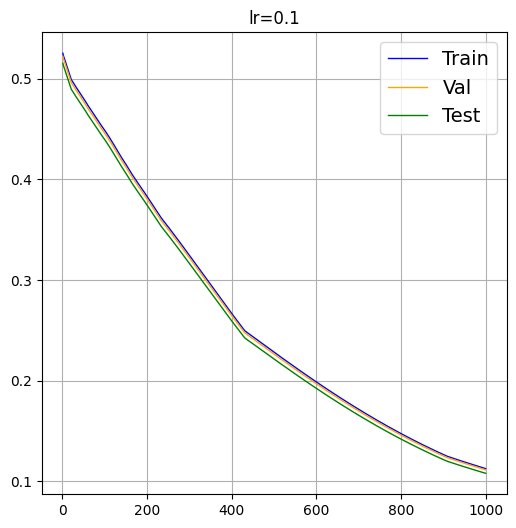

In [70]:
#@title plot
fig8, ax8 = plt.subplots(1, 1)
fig8.set_size_inches((6, 6))

ax8.plot(np.linspace(1, epochs, epochs), train_loss,      label='Train',      linewidth=1, color="blue")
ax8.plot(np.linspace(1, epochs, epochs), valid_loss, label='Val',        linewidth=1, color="orange")
ax8.plot(np.linspace(1, epochs, epochs), test_loss,       label='Test',       linewidth=1, color="green")
ax8.set_title(f'lr={learning_rate}')
ax8.legend(fontsize=14)
ax8.grid()

print(f'learning_rate: \t{learning_rate}')
print(f'Train loss: \t{train_loss[-1]}')
print(f'Test loss: \t{test_loss[-1]}\n')

In [71]:
#@title adagrad
torch.manual_seed(1)
epochs = 100

regressor = Regressor()
mse_loss = nn.MSELoss()
optimizer = torch.optim.Adagrad(params=regressor.parameters(), lr=learning_rate)

train_loss=[]
valid_loss=[]
test_loss=[]

for i in range(epochs):
  preds = regressor(X_train)
  loss = mse_loss(preds, Y_train)

  preds1 = regressor(X_valid)
  loss1 = mse_loss(preds1, Y_valid)

  preds2 = regressor(X_test)
  loss2 = mse_loss(preds2, Y_test)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  train_loss.append(loss.data.numpy())
  valid_loss.append(loss1.data.numpy())
  test_loss.append(loss2.data.numpy())

learning_rate: 	0.1
Train loss: 	0.006099190562963486
Test loss: 	0.005763118155300617



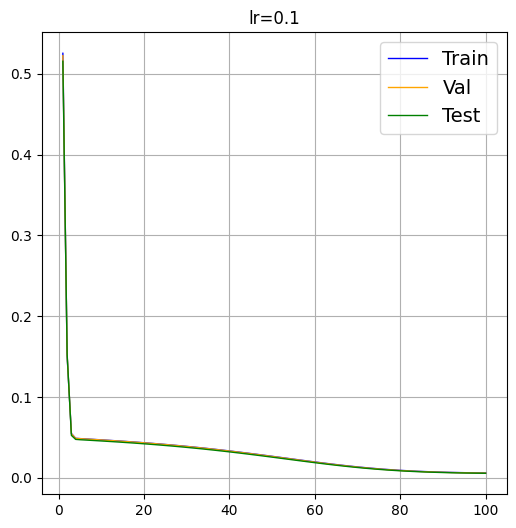

In [72]:
#@title plot
fig8, ax8 = plt.subplots(1, 1)
fig8.set_size_inches((6, 6))

ax8.plot(np.linspace(1, epochs, epochs), train_loss,      label='Train',      linewidth=1, color="blue")
ax8.plot(np.linspace(1, epochs, epochs), valid_loss, label='Val',        linewidth=1, color="orange")
ax8.plot(np.linspace(1, epochs, epochs), test_loss,       label='Test',       linewidth=1, color="green")
ax8.set_title(f'lr={learning_rate}')
ax8.legend(fontsize=14)
ax8.grid()

print(f'learning_rate: \t{learning_rate}')
print(f'Train loss: \t{train_loss[-1]}')
print(f'Test loss: \t{test_loss[-1]}\n')

In [73]:
#@title rmsprop
torch.manual_seed(1)
epochs = 100

alphas = [0.0, 0.3, 0.6, 0.9]

train_loss=[[], [], [], []]
valid_loss=[[], [], [], []]
test_loss=[[], [], [], []]

for j, _alpha in enumerate(alphas):

  regressor = Regressor()
  mse_loss = nn.MSELoss()
  optimizer = torch.optim.RMSprop(params=regressor.parameters(), lr=learning_rate, alpha=_alpha)

  for i in range(epochs):
    preds = regressor(X_train)
    loss = mse_loss(preds, Y_train)

    preds1 = regressor(X_valid)
    loss1 = mse_loss(preds1, Y_valid)

    preds2 = regressor(X_test)
    loss2 = mse_loss(preds2, Y_test)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss[j].append(loss.data.numpy())
    valid_loss[j].append(loss1.data.numpy())
    test_loss[j].append(loss2.data.numpy())

alpha: 	0.0
Train loss: 	0.10125590860843658
Test loss: 	0.10271933674812317

alpha: 	0.3
Train loss: 	0.031765054911375046
Test loss: 	0.03234339877963066

alpha: 	0.6
Train loss: 	0.02547682821750641
Test loss: 	0.025915861129760742

alpha: 	0.9
Train loss: 	0.02034643664956093
Test loss: 	0.01881246082484722



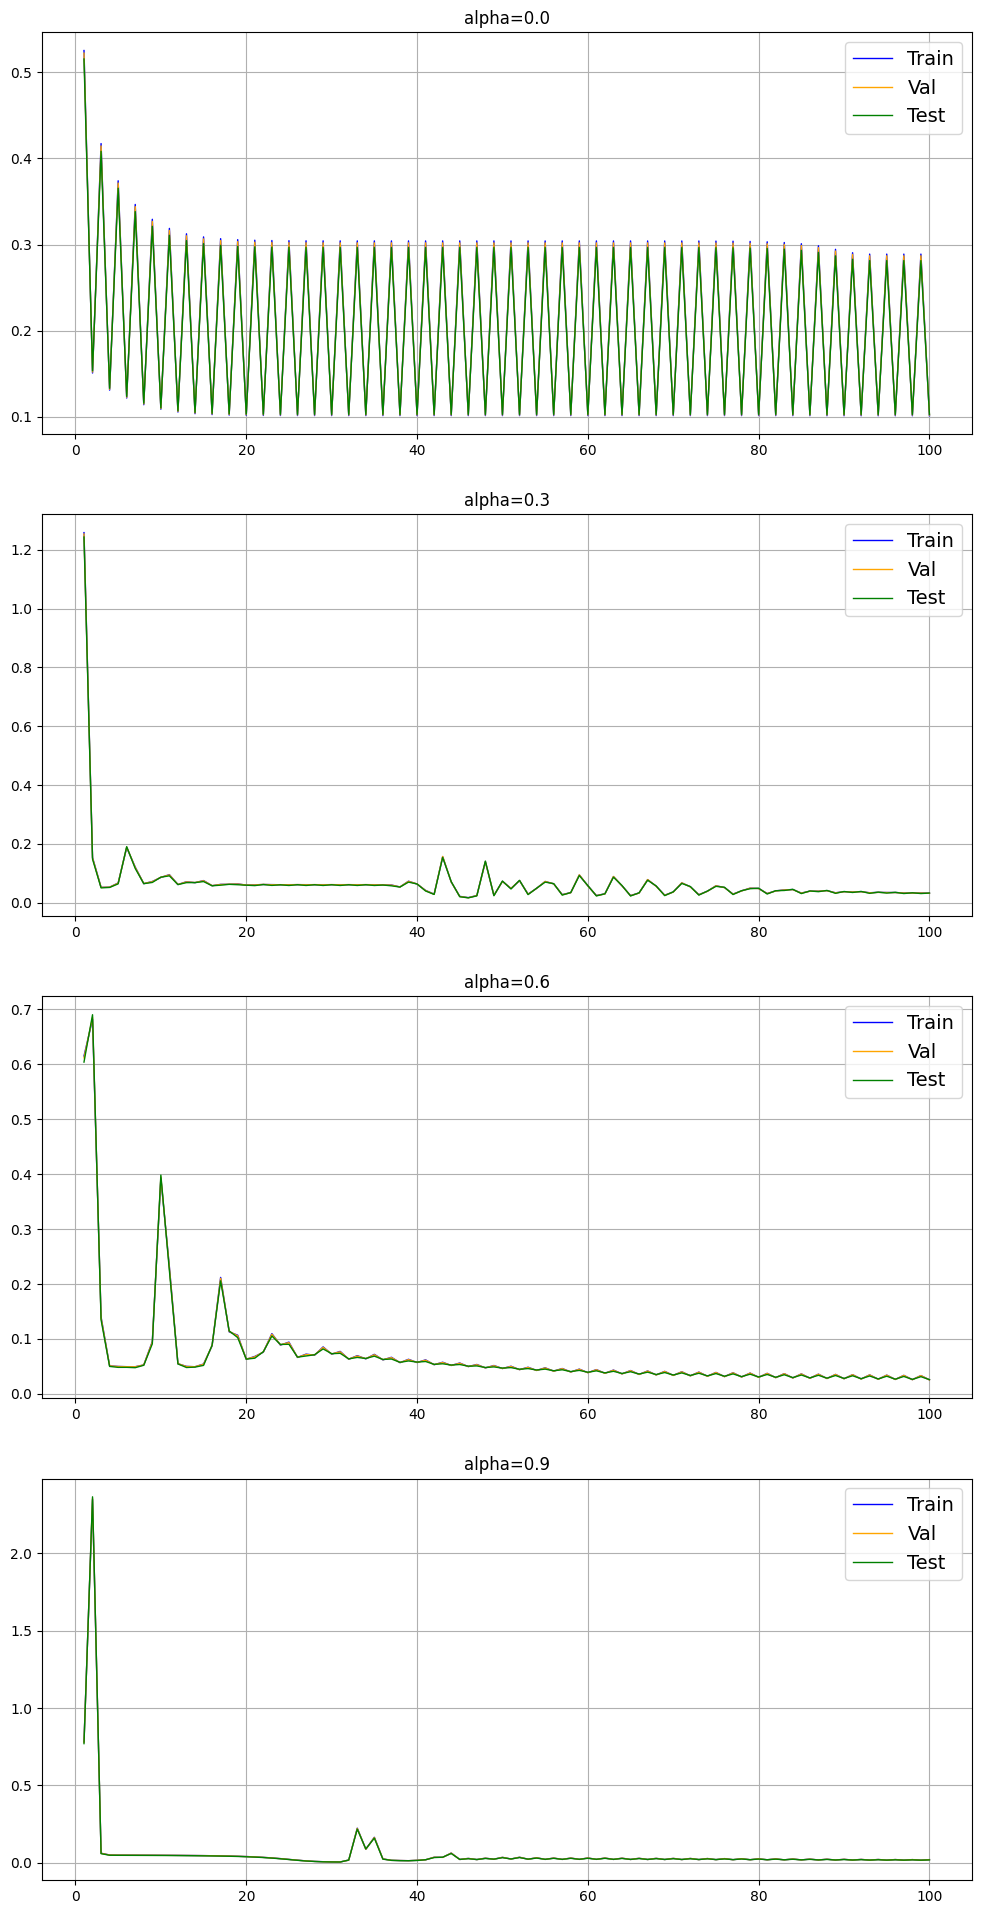

In [74]:
#@title plot
fig8, ax8 = plt.subplots(4, 1)
fig8.set_size_inches((12, 24))

for i, _alpha in enumerate(alphas):
  ax8[i].plot(np.linspace(1, epochs, epochs), train_loss[i],      label='Train',      linewidth=1, color="blue")
  ax8[i].plot(np.linspace(1, epochs, epochs), valid_loss[i], label='Val',        linewidth=1, color="orange")
  ax8[i].plot(np.linspace(1, epochs, epochs), test_loss[i],       label='Test',       linewidth=1, color="green")
  ax8[i].set_title(f'alpha={_alpha}')
  ax8[i].legend(fontsize=14)
  ax8[i].grid()

  print(f'alpha: \t{_alpha}')
  print(f'Train loss: \t{train_loss[i][-1]}')
  print(f'Test loss: \t{test_loss[i][-1]}\n')

In [75]:
#@title adadelta
torch.manual_seed(1)
epochs = 100

alphas = [0.0, 0.3, 0.6, 0.9]

train_loss=[[], [], [], []]
valid_loss=[[], [], [], []]
test_loss=[[], [], [], []]

for j, _alpha in enumerate(alphas):

  regressor = Regressor()
  mse_loss = nn.MSELoss()
  optimizer = torch.optim.Adadelta(params=regressor.parameters(), lr=learning_rate, rho=_alpha)

  for i in range(epochs):
    preds = regressor(X_train)
    loss = mse_loss(preds, Y_train)

    preds1 = regressor(X_valid)
    loss1 = mse_loss(preds1, Y_valid)

    preds2 = regressor(X_test)
    loss2 = mse_loss(preds2, Y_test)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss[j].append(loss.data.numpy())
    valid_loss[j].append(loss1.data.numpy())
    test_loss[j].append(loss2.data.numpy())

alpha: 	0.0
Train loss: 	0.04995768144726753
Test loss: 	0.04828660935163498

alpha: 	0.3
Train loss: 	0.49546125531196594
Test loss: 	0.48578837513923645

alpha: 	0.6
Train loss: 	0.1623459756374359
Test loss: 	0.15659338235855103

alpha: 	0.9
Train loss: 	0.3124484419822693
Test loss: 	0.3046022057533264



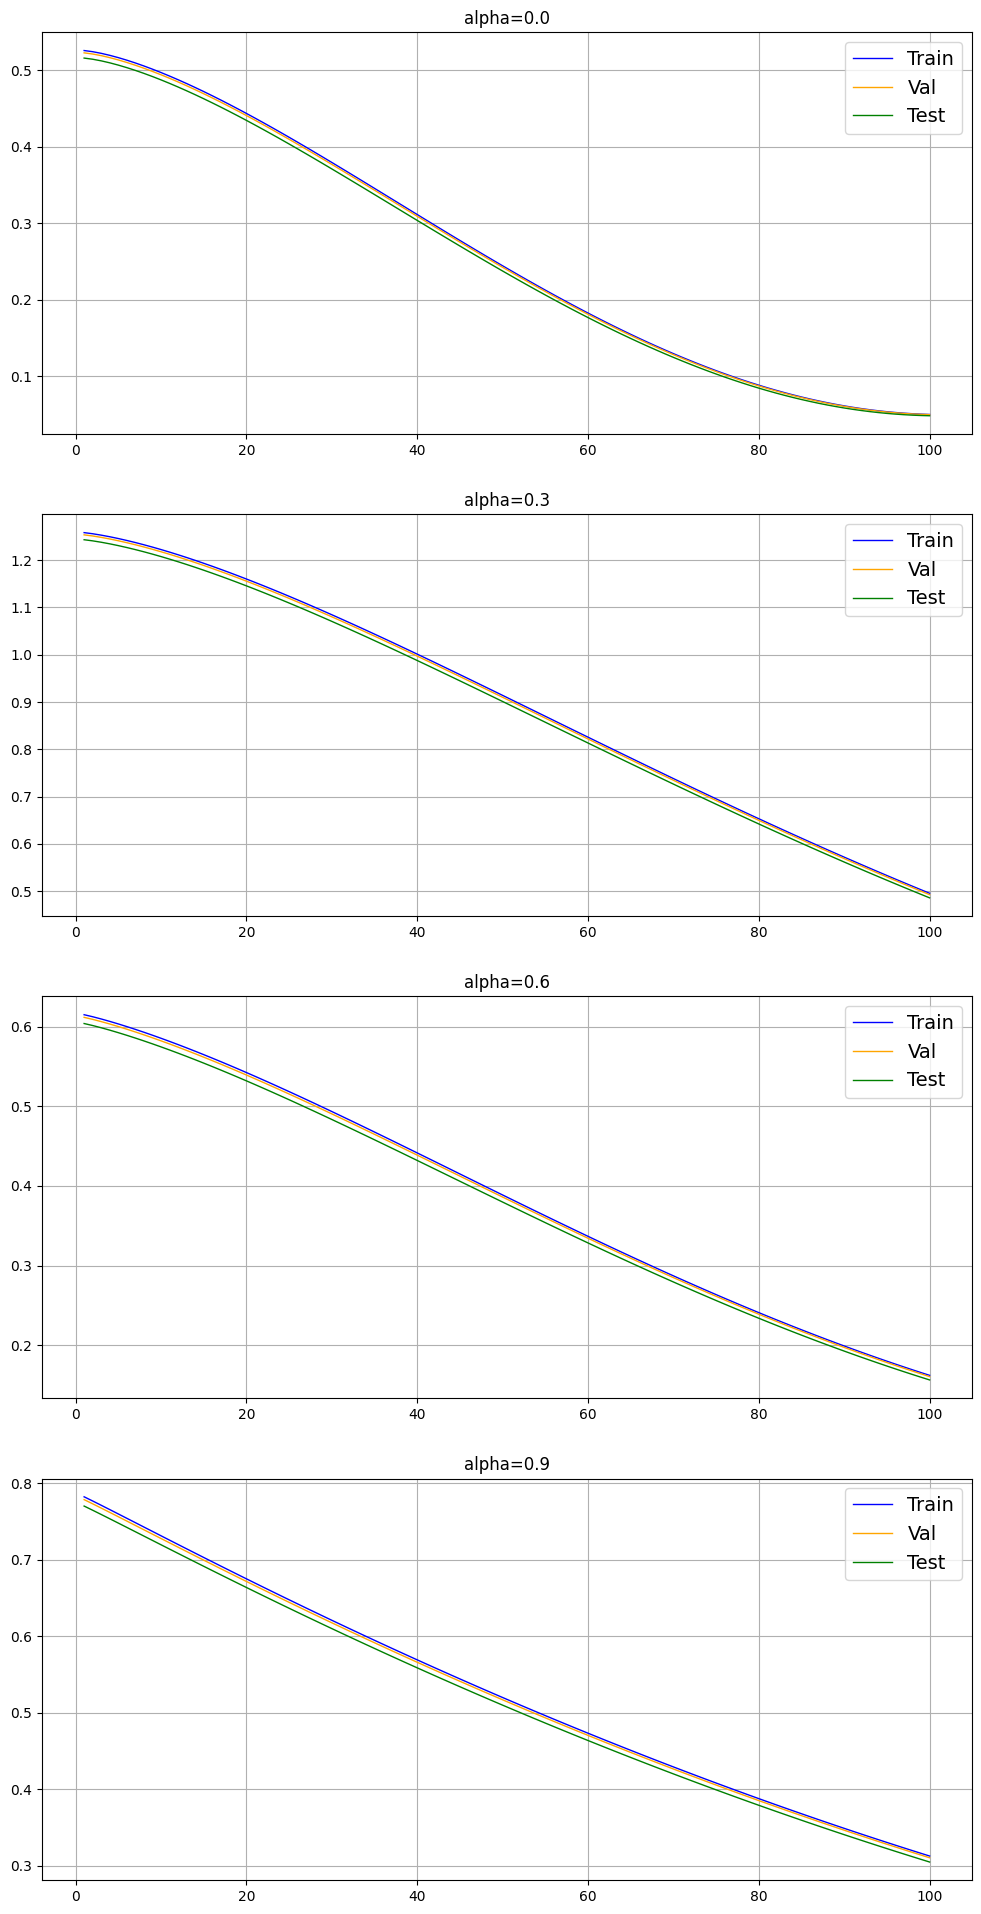

In [76]:
#@title plot

fig8, ax8 = plt.subplots(4, 1)
fig8.set_size_inches((12, 24))

for i, _alpha in enumerate(alphas):
  ax8[i].plot(np.linspace(1, epochs, epochs), train_loss[i],      label='Train',      linewidth=1, color="blue")
  ax8[i].plot(np.linspace(1, epochs, epochs), valid_loss[i], label='Val',        linewidth=1, color="orange")
  ax8[i].plot(np.linspace(1, epochs, epochs), test_loss[i],       label='Test',       linewidth=1, color="green")
  ax8[i].set_title(f'alpha={_alpha}')
  ax8[i].legend(fontsize=14)
  ax8[i].grid()

  print(f'alpha: \t{_alpha}')
  print(f'Train loss: \t{train_loss[i][-1]}')
  print(f'Test loss: \t{test_loss[i][-1]}\n')

In [77]:
#@title adam
torch.manual_seed(1)
epochs = 100

alphas = [[0.0, 0.0], [0.1, 0.01], [0.3, 0.6], [0.6, 0.3], [0.5, 0.5], [0.9, 0.9]]

train_loss=[[], [], [], [], [], []]
valid_loss=[[], [], [], [], [], []]
test_loss=[[], [], [], [], [], []]

weights = [[[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []]]

for j, _alpha in enumerate(alphas):

  regressor = Regressor()
  mse_loss = nn.MSELoss()
  optimizer = torch.optim.Adam(params=regressor.parameters(), lr=learning_rate, betas=_alpha)

  for i in range(epochs):
    preds = regressor(X_train)
    loss = mse_loss(preds, Y_train)

    preds1 = regressor(X_valid)
    loss1 = mse_loss(preds1, Y_valid)

    preds2 = regressor(X_test)
    loss2 = mse_loss(preds2, Y_test)

    weights[j][0].append(regressor.first_layer.weight[0,0].item())
    weights[j][1].append(regressor.second_layer.weight[4,4].item())
    weights[j][2].append(regressor.final_layer.weight[0,0].item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss[j].append(loss.data.numpy())
    valid_loss[j].append(loss1.data.numpy())
    test_loss[j].append(loss2.data.numpy())

alpha: 	[0.0, 0.0]
Train loss: 	0.10125590860843658
Test loss: 	0.10271933674812317

alpha: 	[0.1, 0.01]
Train loss: 	0.055476363748311996
Test loss: 	0.052538126707077026

alpha: 	[0.3, 0.6]
Train loss: 	0.005129883997142315
Test loss: 	0.004891546908766031

alpha: 	[0.6, 0.3]
Train loss: 	0.005417454056441784
Test loss: 	0.005148501601070166

alpha: 	[0.5, 0.5]
Train loss: 	0.0058646430261433125
Test loss: 	0.005804446060210466

alpha: 	[0.9, 0.9]
Train loss: 	0.003766154870390892
Test loss: 	0.003645273856818676



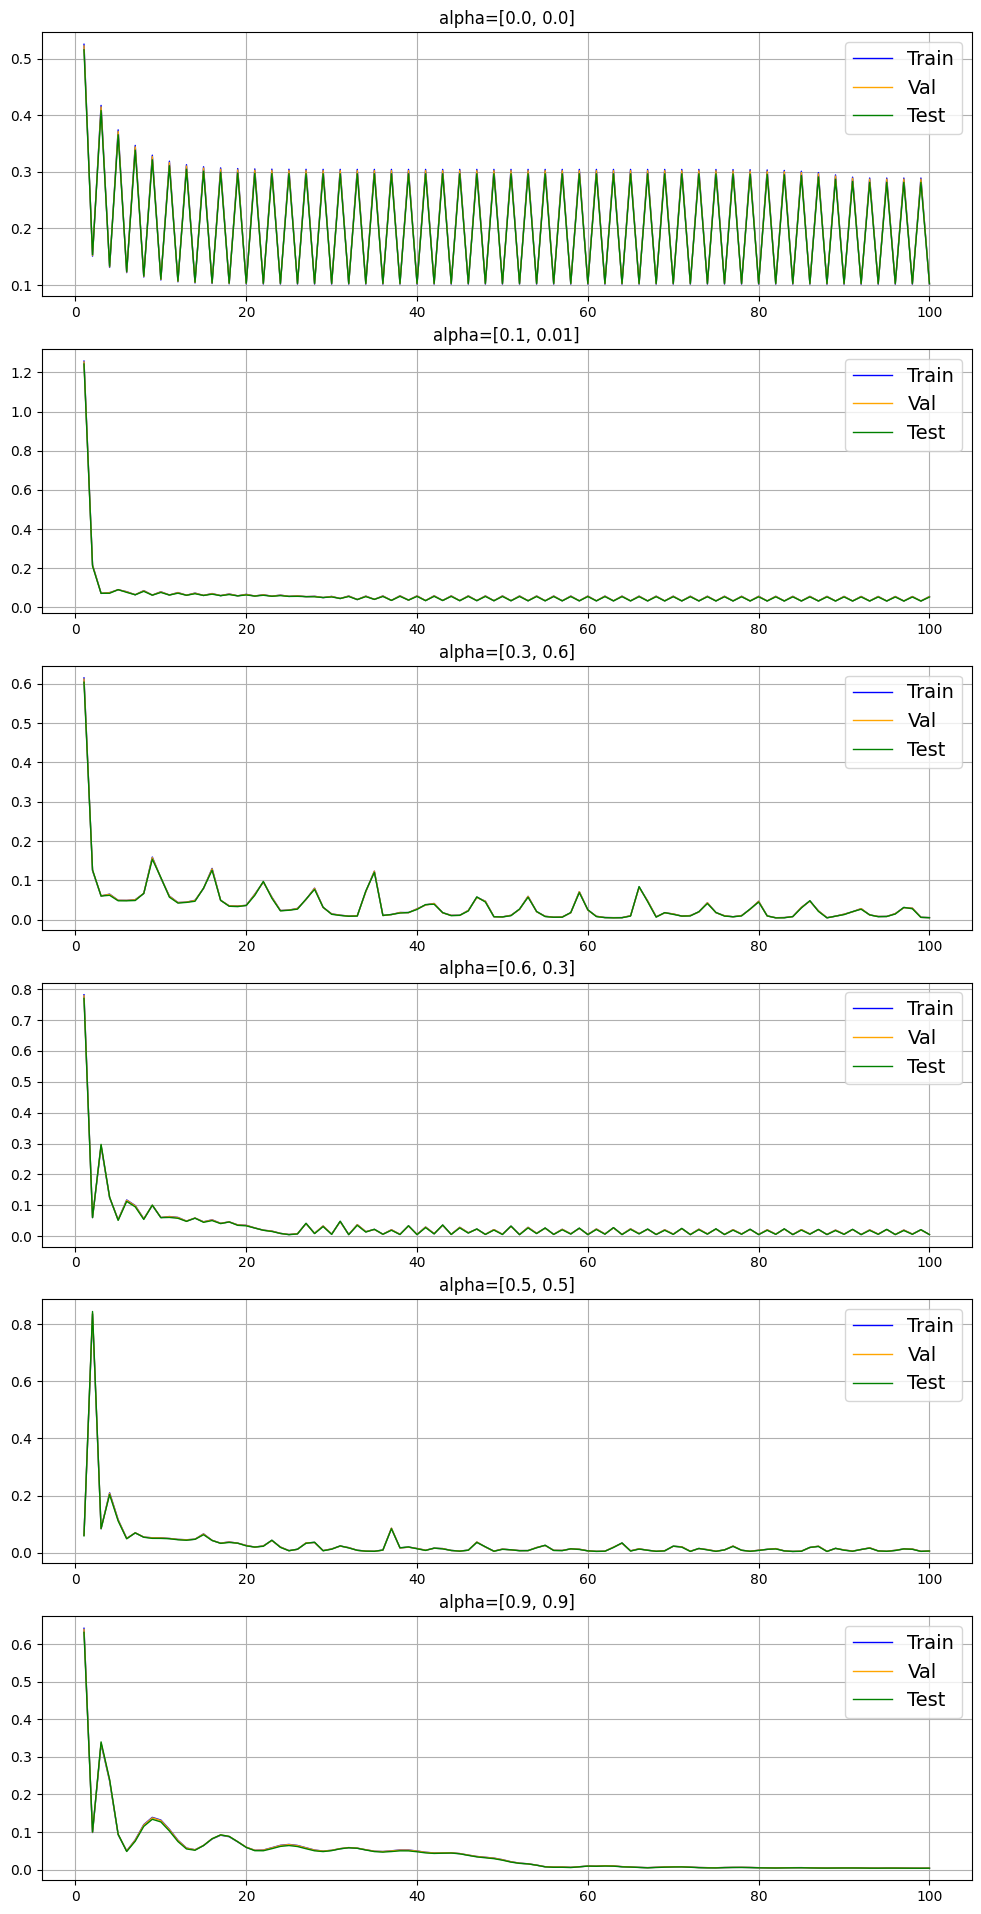

In [78]:
#@title plot
fig8, ax8 = plt.subplots(6, 1)
fig8.set_size_inches((12, 24))

for i, _alpha in enumerate(alphas):
  ax8[i].plot(np.linspace(1, epochs, epochs), train_loss[i],      label='Train',      linewidth=1, color="blue")
  ax8[i].plot(np.linspace(1, epochs, epochs), valid_loss[i], label='Val',        linewidth=1, color="orange")
  ax8[i].plot(np.linspace(1, epochs, epochs), test_loss[i],       label='Test',       linewidth=1, color="green")
  ax8[i].set_title(f'alpha={_alpha}')
  ax8[i].legend(fontsize=14)
  ax8[i].grid()

  print(f'alpha: \t{_alpha}')
  print(f'Train loss: \t{train_loss[i][-1]}')
  print(f'Test loss: \t{test_loss[i][-1]}\n')

alpha: 	[0.0, 0.0]
Train loss: 	0.10125590860843658
Test loss: 	0.10271933674812317

alpha: 	[0.1, 0.01]
Train loss: 	0.055476363748311996
Test loss: 	0.052538126707077026

alpha: 	[0.3, 0.6]
Train loss: 	0.005129883997142315
Test loss: 	0.004891546908766031

alpha: 	[0.6, 0.3]
Train loss: 	0.005417454056441784
Test loss: 	0.005148501601070166

alpha: 	[0.5, 0.5]
Train loss: 	0.0058646430261433125
Test loss: 	0.005804446060210466

alpha: 	[0.9, 0.9]
Train loss: 	0.003766154870390892
Test loss: 	0.003645273856818676



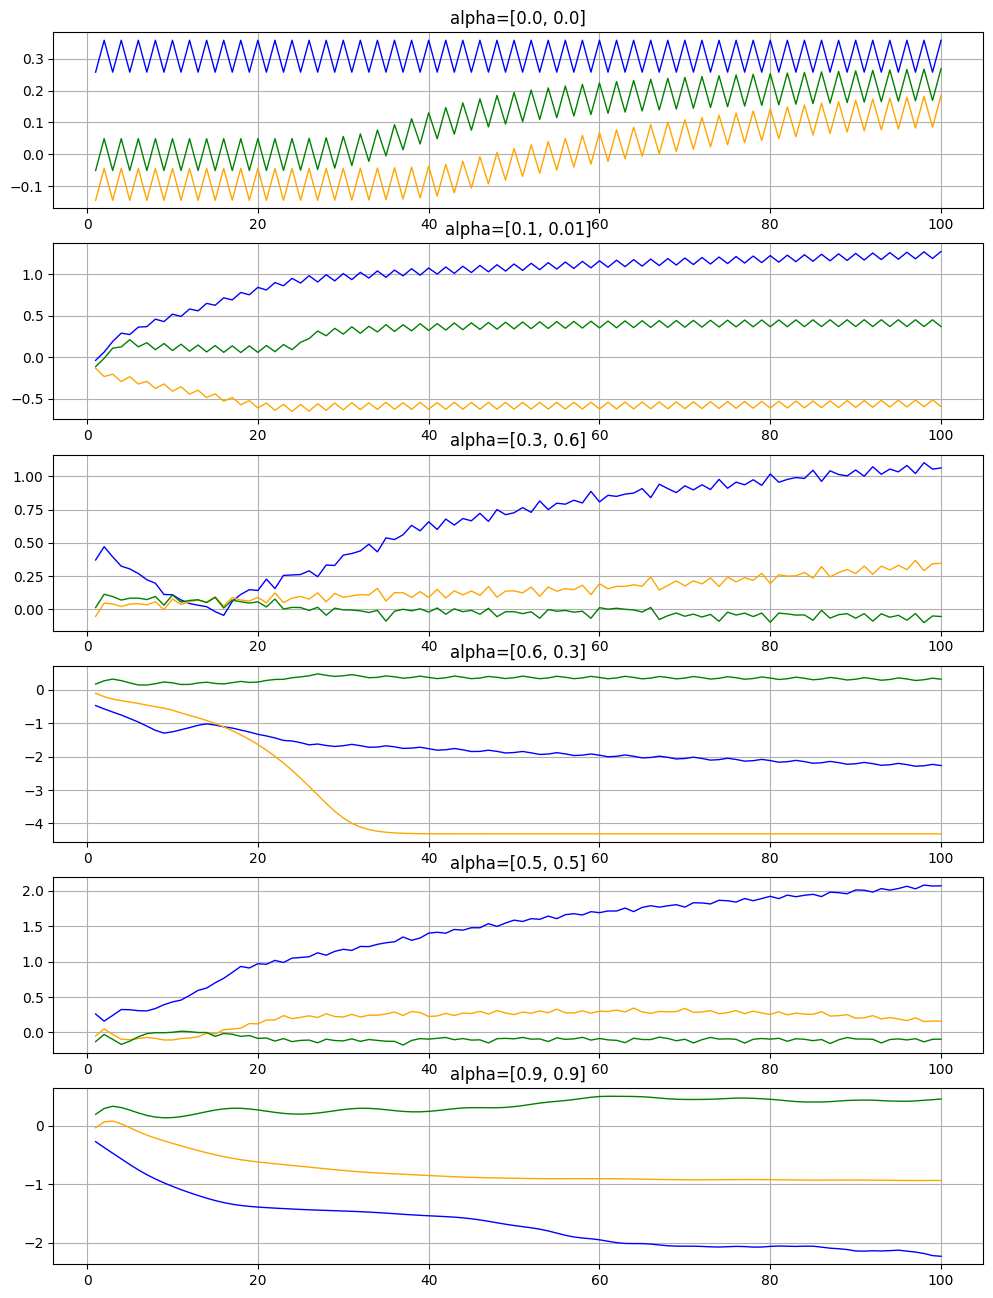

In [79]:
#@title plot weights

fig8, ax8 = plt.subplots(6, 1)
fig8.set_size_inches((12, 16))


for i, _alpha in enumerate(alphas):
  ax8[i].plot(np.linspace(1, epochs, epochs), weights[i][0],     linewidth=1, color="blue")
  ax8[i].plot(np.linspace(1, epochs, epochs), weights[i][1],      linewidth=1, color="orange")
  ax8[i].plot(np.linspace(1, epochs, epochs), weights[i][2],       linewidth=1, color="green")
  ax8[i].set_title(f'alpha={_alpha}')
  ax8[i].grid()

  print(f'alpha: \t{_alpha}')
  print(f'Train loss: \t{train_loss[i][-1]}')
  print(f'Test loss: \t{test_loss[i][-1]}\n')

In [81]:
#@title Rprop
torch.manual_seed(1)
epochs = 100

train_loss=[[], [], [], [], [], []]
valid_loss=[[], [], [], [], [], []]
test_loss=[[], [], [], [], [], []]

alphas = [1]
weights = [[[], [], []]]
for j, _alpha in enumerate(alphas):

  regressor = Regressor()
  mse_loss = nn.MSELoss()
  optimizer = torch.optim.Rprop(params=regressor.parameters(), lr=learning_rate)

  for i in range(epochs):
    preds = regressor(X_train)
    loss = mse_loss(preds, Y_train)

    preds1 = regressor(X_valid)
    loss1 = mse_loss(preds1, Y_valid)

    preds2 = regressor(X_test)
    loss2 = mse_loss(preds2, Y_test)

    weights[j][0].append(regressor.first_layer.weight[0,0].item())
    weights[j][1].append(regressor.second_layer.weight[4,4].item())
    weights[j][2].append(regressor.final_layer.weight[0,0].item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss[j].append(loss.data.numpy())
    valid_loss[j].append(loss1.data.numpy())
    test_loss[j].append(loss2.data.numpy())

alpha: 	1
Train loss: 	0.0034899339079856873
Test loss: 	0.0034028717782348394



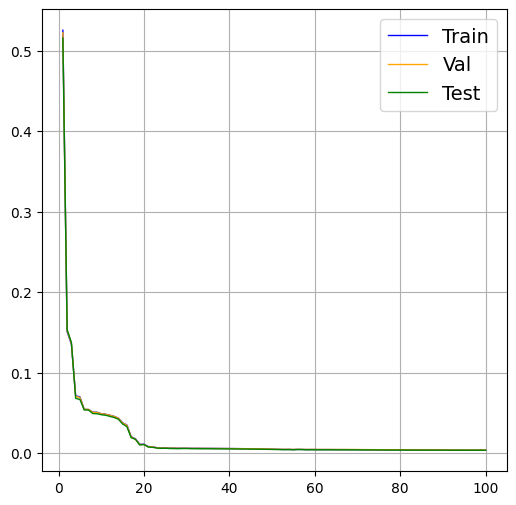

In [82]:
#@title plot
fig8, ax8 = plt.subplots(1, 1)
fig8.set_size_inches((6, 6))

for i, _alpha in enumerate(alphas):
  ax8.plot(np.linspace(1, epochs, epochs), train_loss[i],      label='Train',      linewidth=1, color="blue")
  ax8.plot(np.linspace(1, epochs, epochs), valid_loss[i], label='Val',        linewidth=1, color="orange")
  ax8.plot(np.linspace(1, epochs, epochs), test_loss[i],       label='Test',       linewidth=1, color="green")
  #ax8.set_title(f'alpha={_alpha}')
  ax8.legend(fontsize=14)
  ax8.grid()

  print(f'alpha: \t{_alpha}')
  print(f'Train loss: \t{train_loss[i][-1]}')
  print(f'Test loss: \t{test_loss[i][-1]}\n')

[[0.2576315999031067, 0.3576315939426422, 0.3576315939426422, 0.30763158202171326, 0.30763158202171326, 0.33263158798217773, 0.33263158798217773, 0.3201315999031067, 0.30513161420822144, 0.2871316075325012, 0.26553159952163696, 0.23961159586906433, 0.20850759744644165, 0.171182781457901, 0.12639300525188446, 0.07264527678489685, 0.07264527678489685, 0.09951914101839066, 0.09951914101839066, 0.11295607686042786, 0.11295607686042786, 0.11967454105615616, 0.12773670256137848, 0.12773670256137848, 0.13176777958869934, 0.13176777958869934, 0.1297522336244583, 0.1297522336244583, 0.1287444680929184, 0.1275351494550705, 0.12608395516872406, 0.12434253096580505, 0.12225282192230225, 0.1197451651096344, 0.11673597991466522, 0.11312495917081833, 0.10879173129796982, 0.10359185934066772, 0.09735201299190521, 0.08986419439315796, 0.08087880909442902, 0.07009635120630264, 0.057157400995492935, 0.04163065925240517, 0.04163065925240517, 0.03386728838086128, 0.03386728838086128, 0.02998560294508934, 0

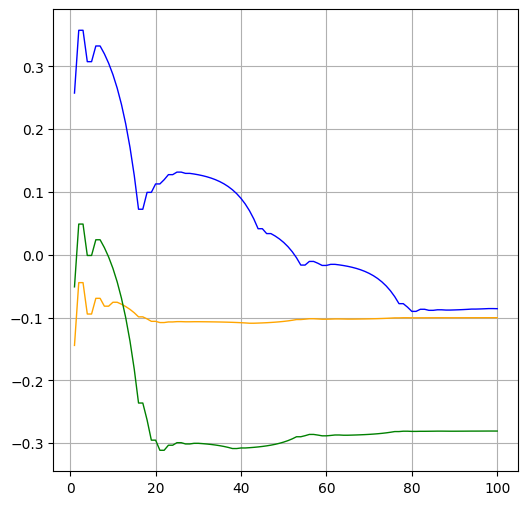

In [83]:
#@title plot weights
fig8, ax8 = plt.subplots(1, 1)
fig8.set_size_inches((6, 6))

print(weights[0])

for i, _alpha in enumerate(alphas):
  ax8.plot(np.linspace(1, epochs, epochs), weights[i][0],     linewidth=1, color="blue")
  ax8.plot(np.linspace(1, epochs, epochs), weights[i][1],      linewidth=1, color="orange")
  ax8.plot(np.linspace(1, epochs, epochs), weights[i][2],       linewidth=1, color="green")
  #ax8.set_title(f'alpha={_alpha}')
  ax8.grid()

  print(f'alpha: \t{_alpha}')
  print(f'Train loss: \t{train_loss[i][-1]}')
  print(f'Test loss: \t{test_loss[i][-1]}\n')

In [84]:
#@title Левенберг не работает
# в torch его нет, как подружить torch с torchimize я не понял

torch.manual_seed(1)
epochs = 100

train_loss=[[], [], [], [], [], []]
valid_loss=[[], [], [], [], [], []]
test_loss=[[], [], [], [], [], []]

alphas = [1]
weights = [[[], [], []]]
for j, _alpha in enumerate(alphas):

  regressor = Regressor()
  mse_loss = nn.MSELoss()
  #optimizer = torch.optim.Adam(params=regressor.parameters(), lr=0.23)

  for i in range(epochs):
    preds = regressor(X_train)
    loss = mse_loss(preds, Y_train)

    preds1 = regressor(X_valid)
    loss1 = mse_loss(preds1, Y_valid)

    preds2 = regressor(X_test)
    loss2 = mse_loss(preds2, Y_test)

    weights[j][0].append(regressor.first_layer.weight[0,0].item())
    weights[j][1].append(regressor.second_layer.weight[4,4].item())
    weights[j][2].append(regressor.final_layer.weight[0,0].item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss[j].append(loss.data.numpy())
    valid_loss[j].append(loss1.data.numpy())
    test_loss[j].append(loss2.data.numpy())

alpha: 	1
Train loss: 	0.5253503918647766
Test loss: 	0.5155020356178284



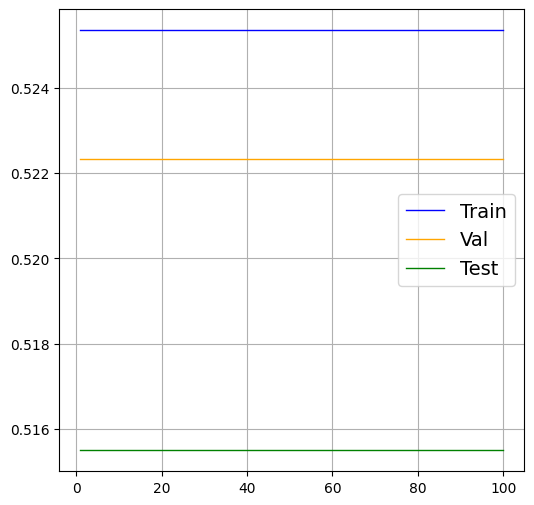

In [85]:
#@title plot
fig8, ax8 = plt.subplots(1, 1)
fig8.set_size_inches((6, 6))

for i, _alpha in enumerate(alphas):
  ax8.plot(np.linspace(1, epochs, epochs), train_loss[i],      label='Train',      linewidth=1, color="blue")
  ax8.plot(np.linspace(1, epochs, epochs), valid_loss[i], label='Val',        linewidth=1, color="orange")
  ax8.plot(np.linspace(1, epochs, epochs), test_loss[i],       label='Test',       linewidth=1, color="green")
  #ax8.set_title(f'alpha={_alpha}')
  ax8.legend(fontsize=14)
  ax8.grid()

  print(f'alpha: \t{_alpha}')
  print(f'Train loss: \t{train_loss[i][-1]}')
  print(f'Test loss: \t{test_loss[i][-1]}\n')

In [86]:
#@title lbfgs
torch.manual_seed(1)
epochs = 100

regressor = Regressor()
mse_loss = nn.MSELoss()
optimizer = torch.optim.LBFGS(regressor.parameters(), lr=learning_rate)

train_loss=[]
valid_loss=[]
test_loss=[]

def closure():
    optimizer.zero_grad()
    mse_loss(regressor(X_train), Y_train).backward()
    return loss

for i in range(epochs):
  preds = regressor(X_train)
  loss = mse_loss(preds, Y_train)

  preds1 = regressor(X_valid)
  loss1 = mse_loss(preds1, Y_valid)

  preds2 = regressor(X_test)
  loss2 = mse_loss(preds2, Y_test)

  optimizer.step(closure)

  train_loss.append(loss.data.numpy())
  valid_loss.append(loss1.data.numpy())
  test_loss.append(loss2.data.numpy())

alpha: 	1
Train loss: 	0.013337016105651855
Test loss: 	0.013795292004942894



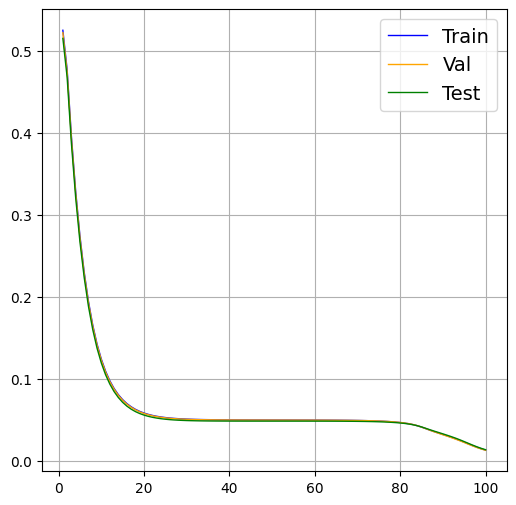

In [87]:
#@title plot
fig8, ax8 = plt.subplots(1, 1)
fig8.set_size_inches((6, 6))

for i, _alpha in enumerate(alphas):
  ax8.plot(np.linspace(1, epochs, epochs), train_loss,      label='Train',      linewidth=1, color="blue")
  ax8.plot(np.linspace(1, epochs, epochs), valid_loss, label='Val',        linewidth=1, color="orange")
  ax8.plot(np.linspace(1, epochs, epochs), test_loss,       label='Test',       linewidth=1, color="green")
  #ax8.set_title(f'alpha={_alpha}')
  ax8.legend(fontsize=14)
  ax8.grid()

  print(f'alpha: \t{_alpha}')
  print(f'Train loss: \t{train_loss[-1]}')
  print(f'Test loss: \t{test_loss[-1]}\n')